In [165]:
%matplotlib inline
import nltk.data;
from gensim.models import word2vec;
from sklearn.cluster import KMeans;
import pandas as pd;
import numpy as np;
import os;
import re;
import sys;
from nltk.corpus import stopwords
import multiprocessing;
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt;
from itertools import cycle;
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle');
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize ,sent_tokenize
ps=PorterStemmer()

In [166]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trimm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [167]:
mydata =  pd.read_csv('trump.txt',sep=",")

In [471]:
print (mydata.head())

               source                                               text  \
0  Twitter for iPhone  Mexico is sending a big delegation to talk abo...   
1  Twitter for iPhone  Peggy Noonan the simplistic writer for Trump H...   
2  Twitter for iPhone  RT @realDonaldTrump: THE TRUTH! The Witch Hunt...   
3  Twitter for iPhone  RT @realDonaldTrump: GREAT NEWS! #MAGA https:/...   
4  Twitter for iPhone  I never called Meghan Markle “nasty.” Made up ...   

            created_at  retweet_count  favorite_count is_retweet  \
0  06-02-2019 18:19:47          23726           90265      False   
1  06-02-2019 18:13:04          14462           58856      False   
2  06-02-2019 13:00:57          15211               0       True   
3  06-02-2019 12:45:31          20071               0       True   
4  06-02-2019 12:44:24          23197           92749      False   

                id_str  
0  1135249668751929345  
1  1135247979617685504  
2  1135169433020915715  
3  1135165545408598016  
4  113516

In [168]:
total_rows = len(mydata);
print(total_rows)

22819


In [559]:
stop_words = set(stopwords.words('english'))
print (stop_words)

{'been', 'once', 'when', 'i', 'all', 'has', 'down', 'the', 'he', "couldn't", 'most', 'have', 'aren', "aren't", 'do', 'whom', "hasn't", 'having', 'your', "isn't", "you're", 'now', 'didn', 'if', 'here', 'just', 'can', 'theirs', 'him', 'don', 'because', 'ours', "wasn't", 'before', 'nor', 'about', 'to', 'myself', 'does', 'wouldn', 'why', 'doing', 'my', 'under', 'any', 'shouldn', "you'd", 'during', 'her', 'not', 'on', 'a', 'were', 'won', 'same', 'what', 'themselves', 'above', 'them', 'which', "you've", 'and', 'of', 'where', "didn't", 'own', 'be', 'ma', 'are', 'no', 'couldn', 'some', "shouldn't", 'so', 'did', "it's", 'over', 'few', 'more', 'ain', 'between', 'mightn', 'after', 'being', 'against', 'y', 't', 'isn', 'only', 'yours', 'as', "won't", 'we', 'below', 'out', 'll', 'hadn', 'in', "doesn't", 'then', 'that', 'who', 'those', 'with', 'while', 'wasn', 'should', 'its', 'their', 'how', 'you', 'it', 'hers', 'this', 'himself', "that'll", 'such', 'his', "haven't", 'each', 'than', 'weren', 'hersel

In [475]:
def clean_text(all_tweets, filesave):
    
    out_file = open(filesave, 'w');
    
    for pos in range(len(all_tweets)):
    
        #Get the comment
        val = all_tweets.iloc[pos]['text'];
        
        #Normalize tabs and remove newlines
        no_tabs = str(val).replace('\t', ' ').replace('\n', '');
        
        #Remove all characters except A-Z and a dot.
        alphas_only = re.sub("[^a-zA-Z\.]", " ", no_tabs);
        
        #Normalize spaces to 1
        multi_spaces = re.sub(" +", " ", alphas_only);
        
        #Strip trailing and leading spaces
        no_spaces = multi_spaces.strip();
        
        #Normalize all charachters to lowercase
        clean_text = no_spaces.lower();
        
        #Get sentences from the tokenizer, remove the dot in each.
        sentences = tokenizer.tokenize(clean_text);
        sentences = [re.sub("[\.]", "", sentence) for sentence in sentences];

        stop_words = set(stopwords.words('english')) 
        stop_words2 = ['poll''https','th','wh','dc','amp','pmo','tco','yth','iq','ol','ry','zh','de','ij','evo','eq','pu','un','fj','xcz','ing','rt']
        
        filtered_text =[]
        all_words=[]
             
        for i in sentences:
            for w in i:
                all_words.append(ps.stem(i))
           
      #  for w in all_words:
       #     ps.stem(w)
        
        for sentence in sentences:
                filtered_text.append(' '.join(ps.stem(w) for w in nltk.word_tokenize(sentence) if w not in stop_words and w not in stop_words2 and len(w)>2))   
       
        #If the text has more than one space (removing single word comments) and one character, write it to the file.
      
        if len(filtered_text)>=2 and filtered_text.count(' ') >=0:
            for sentence in filtered_text:
                out_file.write("%s\n" % sentence)
                print(sentence);
                    
    out_file.close();

In [477]:
clean_tweets = clean_text(mydata,"savetext.txt")


mexico send big deleg talk border
problem talk year
want action talk
could solv border crisi one day desir
otherwis compani job come back usa
peggi noonan simplist writer trump hater stuck past glori reagan idea happen radic left democrat viciou desper
mueller correct ridicul statement peggi never understood
realdonaldtrump truth witch hunt dead
thank marcthiessen
http mykasenb
never call meghan markl nasti
made fake news media got caught cold cnn nytim other apolog doubt
collus obstruct noth democrat tri biggest sin impeach busi
david rivkin constitut scholar
meantim dem get noth done congress
frozen stiff
get back work much
wall construct move along quickli despit radic liber democrat lawsuit
think countri invad mani peopl illeg thing drug want
make america great
coyot illeg immigr easili mani compani job foolishli allow move south border brought back unit state taxat tariff
america enough
peopl say year talk mexico
problem mexico abus unit state take never give
way decad
either stop

north korea fire small weapon disturb peopl other
confid chairman kim keep promis also smile call swampman joe bidan low individu wors
perhap send signal
gopchairwoman realdonaldtrump administr fight better trade deal end china
presid work
addit great incompet corrupt smollett case chicago also hate crime
rememb maga countri turn total lie noth maga countri
seriou stuff even apolog million peopl
jonvoight fellow american
part
http uhqpbzwhh
anoth activist obama appoint judg rule section southern wall alreadi construct
rule border secur favor crime drug human traffick
ask expedit appeal
get readi land japan first ladi melania
look forward see everyon soon
believ roll thunder would given hard time permit washington great patriot gotten know see action
love countri love flag
help
democrat senat mark warner act talk like total control senat intellig committe
noth bipartisan
allow take command committe
import rememb spoke russian jokest
real trade war began year ago lost
bright new age age 

boom economi work peopl make gain seen decad
stuart varney foxandfriend
two tweet miss last batch probabl twitter error
time redo dem get redo
good highli profession deal reason like would gone elsewherether alway plenti money around bank choos
would happi take money
fake news
new big stori trump made lot money buy everyth cash need bank
get cash could russia built great busi need bank would thereand deutschebank
mainstream media never corrupt derang today
fake news actual biggest stori true enemi peopl refus cover real russia hoax
american peopl wise go
fashion true
need want money need want bank
bank alway avail want make money
fake media say disparag alway use unnam sourc sourc even exist
fail new york time pass away leav offic year other fake news media keep write phoni stori use mani bank want busi
wrong need money
old
loudobb god bless presid trump iran call leader must think deal bush obama
maga americafirst
start monday great farmer begin busi mexico canada
taken tariff penalti

anyon notic boston redsox done win sinc come white hous other also done well
white hous visit becom opposit cover sport illustr way boston player great guy
unexpectedli good first quarter
gdp greatli help tariff china
peopl get
thank foxandfriend great show morn congratul number one far rate
well deserv
say openli presid mani friend china china hurt badli make deal compani forc leav china countri
expens buy china
great deal almost complet back
nobodi left china busi
bad china good usa china taken advantag mani year way ahead presid job
therefor china retali get wors
complet avoid non tarif countri buy product insid usa best idea
zero tariff
mani tarif compani leav china vietnam countri asia
china want make deal badli
reason consum pay tariff take effect china today
proven recent point paid point china china subsid product larg degre
also tariff
inform long presid trump presid opposit use everi tool misus everi tool avail make life miser
tomfitton judicialwatch loudobb sadli prove great

process begun place addit tariff remain billion dollar
sell china approxim billion dollar good product big imbal
billion dollar tariff take buy
talk china continu congeni manner absolut need rush tariff paid unit state china billion dollar worth good product
massiv payment directli treasuri
jame comey disgrac fbi worst director long proud histori
brought fbi almost republican democrat thought fire fbi regain great great men women work
housegop bill floor today noth pre exist condit
prevent state reduc pric
dancrenshawtx reach new low deceit polit today
lie protect pre exist condit continu

hous republican vote bad democrat disast supplement bill hurt state farmer border secur
vote tomorrow
want much better
side keep work send good bill immedi sign
great news today administr secur histor donat hiv prevent drug gilead help expand access prep uninsur risk
help achiev goal end hiv epidem america http wux qaswgw
great ralli panama citi beach florida return washington senrickscott senat marc

congrat steel invest billion america innov steel mill
tariff make pennsylvania usa prosper secur bring steel aluminum industri back
tariff work
pittsburgh steel citi
usa economi boom http xpxjxli
day prayer place hope hand creator
give thank wondrou land liberti pray nation home unit state forev strengthen good grace etern glori god http rtsi gwh
unit day prayer renew resolv protect commun faith ensur peopl live pray worship peac
nationaldayofpray http zphae
deregul produc non inflationari prosper american
ask steve work toward futur econom growth countri
steve moor great pro growth economist truli fine person decid withdraw fed process
steve battl idea includ tax cut
byronyork understand talk mueller decid trump obstruct
decid investig
continu monitor situat venezuela close
unit state stand peopl venezuela freedom http rtgfjqjc
judicialwatch presid tomfitton obama allow doj fbi spi realdonaldtrump
scandal gener
judicialwatch
tomfitton discuss obama biden clinton susan rice dnc john br

gopoversight democrat obsess realdonaldtrump
time move solv problem american peopl
http
welcom race sleepi joe
hope intellig long doubt wage success primari campaign
nasti deal peopl truli sick dement idea
make see start gate
despit fact mueller report compos trump hater angri democrat unlimit fund human resourc end result collus obstruct
amaz
mueller fire respect allow finish work mani other say illeg investig crime head trump hater highli conflict group angri democrat
drain swamp
incorrectli report fake news media never told white hous counsel mcgahn fire robert mueller even though legal right
want fire mueller need mcgahn could done
nevertheless
great state tennesse close pass school choic
nation children regardless background deserv shot achiev american dream time get done import

senmikele great state utah written wonder new book entitl lost declar
highli recommend
rep alexandria ocasio cortez correct broken great
trump administr
got veteran choic account pass
presid trump deserv 

convers yesterday presid emmanuelmacron franc
also wish pope franci presid macron happi easter
wonder convers pontifex franci offer condol peopl unit state horribl destruct fire notr dame cathedr
offer help great expert renov construct
democrat congress must return vacat chang immigr law border despit great job done border patrol get wors
big section wall built
wow fbi made payment fake dossier discredit author trump hater christoph steel
oann judicialwatch witch hunt total fraud presid american peopl brought dirti cop crook hillari dnc
believ crazi berni sander sleepi joe biden two finalist run mayb best economi histori countri mani great thing look forward face whoever may
may god rest soul
berni sander wife pay pre trump tax almost incom
alway complain big tax cut except benefit
made fortun trump everyon els good thing bad thing
mani trump fan sign outsid foxnew studio last night thrive thank presid trump bethlehem pennsylvania interview crazi berni sander
big complaint let stuf ber

mike penc
realdonaldtrump job secur border cbp job
time congress job
pleas report american tourist tour guid abduct uganda releas
god bless famili
meantim democrat congress must help republican need vote end horribl costli foolish loophol immigr law
happen smooth
never allow open border
power common sens immigr law stop illeg come mexico remov back countri origin
mexico clean ridicul massiv migrat focus border secur port entri
redeploy agent southern border specif port entri order help larg scale surg illeg migrant tri make way unit state
caus traffic commerci delay time mexico abl use
defend fraudul russian witch hunt
time perpetr fraud american peopl start defend dishonest treason act
terribl event begin never forget
everi member rjc thank incred support outstand commit countri safeti elect republican
next month know rjc help lead parti anoth histor victori trumpatrjc http brsp pxf
someth knew never exist collus russia ridicul obstruct
russia hoax must never happen anoth presid law e

would easi fix weak stupid democrat inspir immigr law
less one hour vote problem would solv
dem care crime want victori trump republican even good usa
honor past servic countri navi seal eddiegallagh soon move less restrict confin await day court
process move quickli foxandfriend repralphnorman
huge thank heathernauert serv america statedept
great work proud join fulbright board http zaa mid
problem matter radic left democrat get matter give never enough
watch harass complain resist theme movement
mayb take victori say got countri run
robert mueller hero radic left democrat rule collus russia ridicul even say
two year sinc insur polici statement made dirti cop got answer want truth
fed mistakenli rais interest rate especi sinc littl inflat done ridicul time quantit tighten
gdp stock market would much higher world market would better place
border larg section border next week
would easi mexico take money talk
besid lose much money especi add drug traffick etc
border close would good thi

report christoph steel back democrat crook hillari paid fake unverifi dossier inform got send watcher low rate cnn
info got witch hunt
feder elect commiss fcc look must collus democrat cours russia one side media coverag fake news
hard believ win
approv rate republican
sorri maga
truli incred show like saturday night live funni talent spend time knock person without much mention side
like advertis without consequ
late night show
realdonaldtrump like thank great republican senat brave vote strong border secur wall

realdonaldtrump never appoint mueller report
illeg conflict investiga
economi good gener motor must get lordstown ohio plant open mayb differ form new owner fast toyota invest
billion other likewis

must act quickli
time essenc
spread fake total discredit dossier unfortun dark stain john mccain
ken starr former independ counsel
far wors stain includ thumb repeal replac year campaign repeal replac
whitehous sheriff hodgson presid stood taken action
american peopl behind
mark m

http
marklevinshow victor davi hanson next
new book case trump http jlorobca
loudobb radic dimm embarrass debat anti semit charg expos divid democrat parti
http
loudobb americafirst marc lotter democrat condemn anti semit
radic left wing socialist
tomfitton
judicialwatch expos clinton oper fbi pay steel time http fich http
aluminum price sinc institut tariff aluminum dump take billion plu job
nice
secretari air forc know equal great import world higher educ
strong thank heather servic
congratul heather wilson sole finalist becom next presid univers texa paso effect septemb
heather done absolut fantast job
bad lawyer fraudster michael cohen said sworn testimoni never ask pardon
lawyer total contradict
lie addit directli ask pardon
said
lie also badli want work white hous
lie
women unemploy rate

januari
thing look good
good time rememb american worker
strongest economi world
stuart varney foxandfriend true
judg lawyer paul manafort case state loudli world hear collus russia
witch hunt h

fals report guess intent respect north korea
kim jong tri hard work someth denuclear make north korea econom powerhous
believ china russia japan south korea help
fiat chrysler ad job michigan detroit area doubl hourli workforc part
billion dollar invest
thank fiat chrysler
come back usa action
michael cohen one mani lawyer repres unfortun
client also
disbar state suprem court lie fraud
bad thing unrel trump
lie order reduc prison time
use crook lawyer
spent time vietnam nang dick blumenth third rate senat connecticut connecticut
war stori heroism vietnam total fraud never even
talk today vietnames leader
ivankatrump
support minimum wage
howev believ minimum guarante peopl unwil work whi
realdonaldtrump senat democrat vote legisl prevent kill newborn infant children
democrat positi
realdonaldtrump rememb one shock vote histori congress
one thing sho
vietnam thrive like place earth
north korea would quickli would denuclear
potenti awesom great opportun like almost none histori friend kim

real defend realdonaldtrump protect america put american first
thank presid
want watch isi fighter permeat europ expect
much spend much time other step job capabl
pull back caliph victori
unit state ask britain franc germani european alli take back isi fighter captur syria put trial
caliph readi fall
altern good one forc releas
trade negoti return china meet trade product
meet mar lago give detail
meantim billion dollar paid unit state china form trade tariff
great job law enforc aurora illinoi
heartfelt condol victim famili
america
tri use amend tri circumv elect despic act unconstitut power grabbingwhich happen third world countri
obey law
attack system constitut
alan dershowitz
tuckercarlson
whitehous
presssec presid trump sign govern fund bill state also take exe
flight elect vote save america still lose talent michael anton terrif read
check
one year ago today horrif act violenc took live student educ parkland florida
somber anniversari honor memori recommit ensur safeti american 

big deal mysteri telephon call innoc trump tower meet media dem said made father conclus found made
made friend busi associ
realli sad
great border patrol agent made biggest fentanyl bust countri histori
thank alway job well done
would suggest read complet testimoni tuesday
fals narr bad countri
valu intellig commun
happili good meet page
conclud great meet intel team oval offic told said tuesday senat hear mischaracter media much agreement iran isi north korea etc
testimoni distort press http aqbmpjf
sadli murder case mexico rose
big contributor humanitarian crisi take place southern border spread throughout countri
wors even afghanistan
much caus drug
wall built
schumer democrat big fan weak passiv iran
clue danger would inflict countri
iran financi chao sanction iran deal termin
dem put bad place good
look china open market financi servic also manufactur farmer busi industri
without deal would unaccept
troop sent southern border stop attempt invas illeg larg caravan countri
stop pre

without wall countri never border nation secur
power wall steel barrier crime rate drug substanti dem know want play polit game
must final done correctli
cave
democrat play polit border secur
foxandfriend
nick sandmann student covington becom symbol fake news evil
captiv attent world know use good mayb even bring peopl togeth
start unpleas end dream
kayajon want show celebr vote realdonaldtrump come forward
better yet let show world
look like nick sandman covington cathol student treat unfairli earli judgement prove fals smear media
good make big comeback new footag show media wrong teen encount nativ american tuckercarlson
democrat kid realli believ say stop crime drug human traffick caravan without wall steel barrier
stop play game give america secur deserv
humanitarian crisi
four peopl nevada vicious rob kill illeg immigr countri
peopl kill border drug gang relat fight
two larg caravan hondura broke mexico head way
need power wall
nanci pelosi think wall immor request take exist wal

likewis want kurd provok turkey
russia iran syria biggest beneficiari long term polici destroy isi syria natur enemi
also benefit time bring troop back home
stop endless war
start long overdu pullout syria hit littl remain isi territori caliph hard mani direct
attack exist nearbi base reform
devast turkey econom hit kurd
creat mile safe zone
wish could share everyon beauti majesti white hous look outsid snow fill lawn rose garden
realli someth special countri special place
thousand illeg alien commit sexual crime children right texa prison
came southern border
end easili need steel barrier wall
wall work john jone texa depart public safeti
foxnew
white hous wait
democrat everywher washington peopl await pay
fun even talk
democrat say daca worth want includ talk
mani hispan come republican side watch
interview jeanin pirro foxnew
watch jessebwatt greggutfeld
terrif peopl
white hous wait cryin chuck nanci call start help countri border within
massiv humanitarian crisi southern border
lon

michael pillsburi interview cvpayn motiv make presid look bad instead presid trump portray hero
first presid take china year overdu
rnc great chairwoman ronna mcdaniel gop never stronger
achiev histor win help last year maga
unit state treasuri taken mani billion dollar tariff charg china countri treat fairli
meantim well variou trade negoti current go
point done
shutdown presidenti elect
democrat know win base achiev trump go desper need wall border secur presidenti harass
strictli polit
remain readi will work democrat pass bill secur border support agent offic ground keep america safe
let get done
import meet today border secur republican democrat leader congress
parti must work togeth pass fund bill protect nation peopl first import duti govern
mexico pay wall new usmca trade deal
much wall alreadi fulli renov built
done lot work

billion dollar hous approv littl comparison benefit nation secur
quick payback
mitt romney fast question flake hope
would much prefer mitt focu border sec

alon poor white hous wait democrat come back make deal desper need border secur
point democrat want make deal cost countri money border wall talk
crazi
saudi arabia agre spend necessari money need help rebuild syria instead unit state
see nice immens wealthi countri help rebuild neighbor rather great countri mile away
thank saudi
wall differ billion dollar border secur
complet wall built shutdown money plu fund alreadi hand
report inaccur point
problem without wall much rest dollar wast
never lash act attorney gener man great respect
made stori one mani fake news media
problem economi fed
feel market understand necessari trade war strong dollar even democrat shutdown border
fed like power golfer score touch putt
sympath brett mcgurk rememb obama appointe respons load airplan
billion dollar cash send iran part horrif iran nuclear deal termin approv littl bob corker
substanti subsid militari mani rich countri world time countri take total advantag taxpay trade
gener matti see problem
fix

countri much money pour drain mani year democrat fight like cat dog come spend boarder secur includ wall militari
militari complet rebuilt
win
keep commun safer provid hope second chanc earn
addit everyth els billion dollar save
look forward sign law
america greatest countri world job fight citizen even made mistak
congratul senat partisan pass histor crimin justic reform bill
beauti time give countri secur citizen deserv
fast save billion dollar month complet
presid donald trump commiss school safeti examin way make school safe student teacher
read http ckw http iiesm
flotu merri christma presid donald trump first ladi melania trump
potu flotu seen saturday decemb
michael isikoff first report dossier alleg serious doubt dossier claim
whole russian collus thing hoax go restor good name mani peopl whose reput destroy
never proven like fals
thank michael isikoff yahoo honesti
mean fisa warrant whole russian witch hunt fraud hoax end immedi
also paid crook hillari dnc
russia dossier repor

leakin jame comey must set record lie congress one day
friday testimoni untruth whole deal rig fraud head dishonest peopl would anyth could becom presid
expos
occas former fbi director jame comey told hous investig know recal rememb thing ask
open investig american know sign know christoph steel
lie
honor attend today armynavygam philadelphia
great game play around hero
congratul armywp footbal win http wdlkm
great honor head armi navi game today
shortli land http byafesq
left right woke dream scream lie
next time vietnam ask dick travel
watch nang dick blumenth televis spew fact almost accur braveri vietnam never saw
bullet whizz nang dick head save soldier
sad day night pari
mayb time end ridicul extrem expens pari agreement return money back peopl form lower tax way ahead curv major countri emiss went last year
collus illus smoke gun
late date gone million spent russian collus
noth impeach
geraldorivera time witch hunt end
idea european militari work well
alway
ask pay fair share na

rnc chair ronna mcdaniel oversaw histori defi gain senat unpreced fundrais strength
ask serv anoth term elect one better job
new book come forget two great origin written greggjarrett judgejeanin pirro
book went
get phoni witch hunt well explain

dbongino new book spygat attempt sabotag donald trump terrif
tough smart realli get
book sale highli recommend
realli done great job captur long held view idea
book sale terrif read realli interest subject

stephenmoor arthur laffer two talent men complet incred book econom polici call trumponom

stevescalis written absolut fascin book back game world polit
experienc much short period time
peopl braveri courag come way back
big power great person
argentina presid vladimir putin
look forward meaning summit soon situat resolv
billion dollar pour coffer usa tariff charg china long way
compani want pay tariff build usa otherwis let make countri richer ever
illeg joseph mccarthi style witch hunt one shatter mani innoc live ever end forev wast possi

longer pay pakistan billion would take money noth bin laden prime exampl afghanistan anoth
one mani countri take unit state without give anyth return
end
cours captur osama bin laden long
point book attack world trade center
presid clinton famous miss shot
paid pakistan billion dollar never told live
fool

cindyhydesmith love mississippi great usa http hqpc crhdi
day one rick scott never waver
great governor even greater senat repres peopl florida
congratul rick wage courag success campaign
catch releas obsolet term
catch detain
illeg immigr tri come usa often proudli fli flag nation ask asylum detain turn away
dem must approv border secur wall
mayor tijuana mexico state citi ill prepar handl mani migrant backlog could last month
likewis ill prepar invas stand
caus crime big problem mexico
home
foxnewssunday chri wallac interview white hous presid trump
check local list watch sund
incred great hero today california
alway http mctf
whitehous presid realdonaldtrump travel california meet

pleas announc matthew whitak chief staff attorney gener jeff session depart justic becom new act attorney gener unit state
serv countri well
accord nbc news voter nationwid disapprov call mueller investig approv
mean final begin understand disgust witch hunt led angri democrat
fair nanci pelosi deserv chosen speaker hous democrat
give hard time perhap add republican vote
earn great honor
democrat think go wast taxpay money investig hous level likewis forc consid investig leak classifi inform much els senat level
two play game
work incred midterm elect embrac certain polici principl well
say goodby yesterday big win pressur nasti hostil media
ron desanti show great courag hard fought campaign becom governor florida
congratul ron famili
receiv mani congratul mani big victori last night includ foreign nation friend wait hope trade deal
get back work get thing done

davidasmanfox democrat respond think posit republican improv candid tonight
realiz import campaign
owe polit career
thank agr

viciou accus justic kavanaugh admit lie stori total made fake imagin becom justic suprem court disgust fals statement
other dem
thank petehegseth katiepavlich nice wise statement economi
realli get foxandfriend
viciou accus justic kavanough admit lie stori total made fake imagin becom justic suprem court disgust fals statement
other dem
head montana florida today everyon excit job number new job octob
also wage rise
wow
indiana ralli coach bobbi knight incred last night
pack hous honor mike braun senat
mike great senat
forget vote
congresswoman maxin water call corrupt member congress foxnew dem win would put charg countri financ
begin end
scott perri pennsylvania fantast
strong border crime militari vet second amend
scott total endors
massiv magar tonight indiana thank
everyon get http pwiwchgbh http jvfo sisz
republican believ countri sanctuari law abid american crimin alien
republican alway stand hero icegov cbp law enforc http jmnmo
fantast magar west virginia thank
everyon get vot

gopchairwoman
realdonaldtrump deliv result american inspir futur leader get involv
fantast even charlott north carolina great patriot
get vote buddforcongress markharrisnc http pwiwchgbh magar replay http bkvtylqdv http qizsw
great honor mani brilliant courag patriot proud american
see today fill extraordinari confid america futur
take part young black leadership summit true leader http lilzbxkjug
would like begin today remark provid updat packag devic mail high profil figur throughout countri media org
pleas inform law enforc apprehend suspect taken custodi
http ufjwjjukld
republican well earli vote poll bomb stuff happen momentum greatli slow news talk polit
unfortun go
republican vote
twitter remov mani peopl account importantli seemingli done someth make much harder join stifl growth point obviou
week ago rocket ship blimp total bia
unit state spend billion dollar year illeg immigr
continu
democrat must give vote pass strong fair law
forc play much tougher hand
roughli marin beirut

assault countri southern border includ crimin element drug pour far import presid trade usmca
hope mexico stop onslaught northern border
democrat fault weak law
usmc live white hous sgt
maj john canley becom marin receiv medal honor
http rrqaoz
congressman neal dunn dunncampaign florida done outstand job everyth maga
work hard hurrican relief rebuild
strong crime strong border love militari vet
neal highest endors
colleg educ women want safeti secur healthcar protect much along financi econom health countri
suppli far better democrat decad actual
vote
hard believ thousand peopl south border walk unimped toward countri form larg caravan democrat approv legisl allow law protect countri
great midterm issu republican
network news gave zero coverag big day stock market yesterday
foxandfriend
august job open hit record
million
congratul usa
headlin differ quot mean stori
help
fake news
ted cruz done much texa includ massiv cut tax regul brought texa best job number histori state
watch care a

ask steve dain great republican senat montana attend daughter anni wed rather come today vote
steve readi whatev necessari number
dain famili congratul wonder day
women kavanaugh mani other support good man gather capitol hill prepar vote
beauti thing see paid profession protest hand expens sign
big day america
women kavanaugh mani other support good man gather capit hill prepar vote
beauti thing see paid profession protest hand expens sign
big day america

unemploy lowest number sinc
rude elev screamer paid profession look make senat look bad
fall also look profession made ident sign
paid soro other
sign made basement love troublemak
realjameswoodss whether love hate trump ascend presid centuri miracl
liter
beauti even rochest minnesota
vote vote vote http syxrxvtpz
made second stop minnesota make america great ralli
need elect karinhousley senat need strong leadership tomemm jason jimhagedornmn petestaub hous

time fbi investig judg kavanaugh
made would still good enough obstructioni

want know money border secur wall ridicul spend bill come midterm dem obstruct law enforc border secur
republican must final get tough
thing lack properli secur border democrat histor level obstruct
senat david perdu georgia
secur border democrat histor level obstruct
presid fed
agenda work
economi grow twice rate obama
nomin confirm feder judg court appeal judg
protect countri middl east would safe long without yet continu push higher higher oil price rememb
opec monopoli must get price
financi job number fantast
plenti new high pay job avail great vibrant economi
happi start look also rememb economi get better
vote midterm
great new book jason chaffetz appropri call deep state
interest inde
return white hous great state north carolina south carolina incred work done ongo fight hurrican florenc
tremend talent spirit
north korea recommit denuclear come long way
foxnew
imposs alreadi expect go grow faster faster
get start
peter ferrara former advisor presid reagan
foxandfriend
recoveri 

market surg collaps
soon take billion tariff make product home
meet meet
fema storm surg deadli
anyon evacu zone carolina virginia must leav yet
florenc
done democrat order make look bad possibl success rais billion dollar help rebuild puerto rico
person die reason like old age add onto list
bad polit
love puerto rico
peopl die two hurrican hit puerto rico
left island storm hit anywher death
time went much
long time later start report realli larg number like
realdonaldtrump presid trump would need magic wand get gdp state presid obama
guess magic wand
cesspool corrupt peopl need brought justic
greggjarrett
text messag former fbi employe peter strzok lisa page disast embarrass fbi doj
never happen learn hour
other leak like mad order get presid
complet readi hurrican florenc storm get even larger power
care
problem banker jami dimon run presid aptitud smart poor public speaker nervou mess otherwis wonder
made lot banker other look much smarter great econom polici
imper everyon follow lo

like nfl whose rate gone way nike get absolut kill anger boycott
wonder idea would way far nfl concern find hard watch alway stand flag
trump economi boom help hous senat gop
farmbil snap work requir bolster farmer get america back work
pass farm bill snap work requir
almost everyon agre administr done less two year administr histori countri
tough hell peopl noth would get done
also question everybodi everyth got elect
shame someon write articl book total make stori form pictur person liter exact opposit fact get away without retribut cost
know washington politician chang libel law
alreadi discredit woodward book mani lie phoni sourc call jeff session mental retard dumb southern
said neither never use term anyon includ jeff southern great thing
made divid
sleepi eye chuck todd fake nbc news said time press stop complain start fight back
actual chuck day announc presid
gone go crazi
woodward book alreadi refut discredit gener secretari defens jame matti gener chief staff john kelli
quot

white hous counsel mcgahn leav posit fall shortli confirm hope judg brett kavanaugh unit state suprem court
work long time truli appreci servic
martha mcsalli extraordinari woman
talent fighter jet pilot highli respect member congress
strong crime border sieg amend
love militari vet
total complet endors
anonym sourc realli start burn media
foxnew fact mani anonym sourc even exist
fiction made fake news report
look lie fake cnn
got caught red hand enemi peopl
obama peopl someth never donethey spi rival presidenti campaign
would trump next lose faith system level
begin think rotten corrupt
scari stuff obama
tuckercarlson doj
congressman ron desanti easili win republican primari oppon novemb biggest dreama fail socialist mayor name andrew gillum allow crime mani problem flourish citi
florida want need
martha mcsalli run arizona primari senat endors reject senat jeff flakeand turn first martha great militari fighter jet pilot highli respect member congress win big
congratul novemb
hillari 

hope john brennan worst cia director countri histori bring lawsuit
easi get record text email document show poor job involv mueller rig witch hunt
sue
collus made phoni crime call collus collus say obstruct phoni crime never exist
fight back say anyth bad rig witch hunt scream obstruct
look troubl
enjoy ruin peopl live refus look real corrupt democrat side lie fire delet email soooo much mueller angri dem look impact elect
nation disgrac
disgrac discredit bob mueller whole group angri democrat thug spent hour white hous councel approv purpos transpar
anybodi need much time know russian collus someon
member media angri fake stori new york time
actual call complain apolog big step forward
day announc time fake news disgust new board member get wors
fail new york time wrote stori made seem like white hous councel turn presid fact opposit two fake report knew
fake news media becom enemi peopl
bad america
collus obstruct except crook hillari democrat
resign corrupt yet heavili conflict bob 

wonder power thing true champion civil right got fire
omarosa zero credibl media want interview work white hous
say bad talk
fake news

markburnetttv call say tape apprentic use terribl disgust word attribut wacki derang omarosa
word vocabulari never
made
look mani recent quot say
scott walker wisconsin tremend governor done incred thing great state
complet total endors brought amaz foxconn wisconsin job much
vote scott tuesday republican primari
great honor sign new defens bill law pay tribut greatest soldier histori world armi
nation defens author act signific invest militari warfight modern histori http sgx
pete stauber run congress minnesota
make great congressman
pete strong crime border love militari vet second amend
vote pete tomorrow
full total endors
land fort drum new york
look forward make speech great hero
frankluntz omarosa book page
claim heard someon heard heard trump use
brook koepka third golf major power game power mind
man steel tour mani victori includ major ahead
c

tariff abl start pay larg amount trillion debt accumul much obama administr time reduc tax peopl
minimum make much better trade deal countri
tariff work big time
everi countri earth want take wealth alway detriment
say cometax
want tax let make build product either event mean job great wealth
fake news hate say enemi peopl know true
provid great servic explain american peopl
purpos caus great divis distrust
also caus war danger sick
danni connor total puppet nanci pelosi maxin water danni want rais tax open border take away amend
vote troy tuesday
great night ohio congression district troy balderson troy love ohio love peopl ohio
fight way
thank ohio
love http hysaqob
china first time poorli spend fortun ad
tri convinc scare politician fight tariff realli hurt economi
likewis countri
win must strong
tariff make countri much richer today
fool would disagre
use negoti fair trade deal countri still unwil negoti pay vast sum money form tariff
win either way
tariff tremend posit impact stee

media coverag administr neg despit tremend posit result achiev surpris confid media time low allow great countri sold anti trump hater
would will shut govern democrat give vote border secur includ wall must get rid lotteri catch releas etc
final system immigr base merit need great peopl come countri
good interest meet white hous sulzberg publish new york time
spent much time talk vast amount fake news put media fake news morph phrase enemi peopl
sad
realdonaldtrump congressman david kustoff champion trump agenda greatli appreci support
david strong
realdonaldtrump thing democrat well resist campaign slogan obstruct
cryin chuck schume
pleas understand consequ peopl cross border illeg whether children mani use children sinist purpos
congress must act fix dumbest worst immigr law anywher world vote
wow highest poll number histori republican parti
includ honest abe lincoln ronald reagan
must someth wrong pleas recheck poll
tom homan fmr ice director nobodi done border secur public safeti p

collus obstruct matter angri democrat republican total protect democrat want witch hunt drag novemb elect
republican better get smart fast expos
rig witch hunt head angri democrat ad one work directli obama
seem intent damag republican parti chanc novemb elect
democrat excus lose elect never end
inconceiv govern would break lawyer offic earli morn almost unheard
even inconceiv lawyer would tape client total unheard perhap illeg
good news favorit presid noth wrong
nfl nation anthem debat aliv well believ contract player must stand attent hand heart commission must make stand
first time kneel game
second time kneel season pay
ivankatrump
whitehous nation council american worker togeth privat sector work equip student worker
got sever critic fake news media nice presid putin
old day would call diplomaci
loud viciou would critic tough
rememb said tough chairman kim hypocrit
realdonaldtrump told european union slap five billion dollar fine one great compani googl

realdonaldtrump summit rus

realdonaldtrump thing better ever quickli
fight level play field
realdonaldtrump brussel alway think farmer
soy bean fell elect
farmer
realdonaldtrump democrat congress must longer obstruct vote fix terribl immigr law
watch
good nato germani pay russia billion dollar ga energi countri met commit pay europ protect lose billion trade
must pay gdp immedi
good nato germani pay russia billion dollar ga energi countri met commit pay europ protect lose billion trade
must pay gdp immedi
democrat congress must longer obstruct vote fix terribl immigr law
watch go europ would soooo simpl fix
judg run system illeg traffick know work
use children
thing better ever quickli
fight level play field farmer win
brussel alway think farmer
soy bean fell elect
farmer done poorli year
countri trade barrier tariff destroy busi
open
talk pfizer ceo secazar drug price blueprint
pfizer roll back price hike american patient pay
applaud pfizer decis hope compani
great news american peopl
european union make imposs

ivankatrump thank secpompeo
honor join talent passion colleagu statedept honor
ivankatrump thank senat alexand leadership career technic educ
million student worker across
new plant built foxconn wisconsin incred
congratul peopl wisconsin governor scott walker govwalk talent repres pull
great job
foxbusi
ivankatrump think one tremend opportun see economi strong peop
six month tax cut million worker receiv bonus pay rais retir account contribut
taxcutsandjobsact http mevjwiingu
go today want address horrif shoot took place yesterday capit gazett newsroom annapoli maryland
attack shock conscienc nation fill heart grief http lalxghk
prior depart wisconsin brief shoot capit gazett annapoli maryland
thought prayer victim famili
thank first respond current scene
milwauke wisconsin meet
soon leav big groundbreak foxconn build great new electron plant wisconsin
job great
peter strzok work leader rig witch hunt long period time got start fire gig
rememb took order comey mccabe took order know
m

hope opec increas output substanti
need keep price
must maintain strong southern border
allow countri overrun illeg immigr democrat tell phoni stori sad grief hope help elect
obama other pictur noth
mexico export come unit state
total reli fine
though strong immigr law
pathet weak ineffect immigr law democrat refus help fix
speak mexico
congressman ron desanti top student yale harvard law school run governor great state florida
ron strong border tough crime big cut tax love militari vet
great governor full endors
congresswoman martha robi alabama consist reliabl vote make america great agenda
republican primari run recent nanci pelosi vote democrat
fulli endors martha alabama congression district
governor henri mcmaster truli fine man love peopl south carolina
one earli support truli help big south carolina victori
see monday vice presid penc henri saturday
republican stop wast time immigr elect senat congressmen women novemb
dem play game intent anyth solv decad old problem
pass great

republican parti start show big number
peopl start see done
result speak loudli
north korea greatest ever economi lead way
congratul kevincram huge win north dakota
need kevin senat strongli endors
heidi vote tax cut alway vote need
kevin strong crime border big cut tax
congratul danni tarkanian big gop primari win nevada
danni work hard got great result
look good novemb
senat clair mccaskil great state missouri flew around luxuri privat jet tour state

peopl realli upset phoni josh hawley win big full endors
funni watch fake news especi nbc cnn
fight hard downplay deal north korea
day ago would beg deal look like war would break
countri biggest enemi fake news easili promulg fool
oil price high opec
good
togeth mexico canada got world cup
congratul great deal hard work
take offic peopl assum go war north korea
presid obama said north korea biggest danger problem
longer sleep well tonight
land long trip everybodi feel much safer day took offic
longer nuclear threat north korea
meet kim

wow strzok page incompet corrupt fbi lover text refer counter intellig oper trump campaign date way back decemb
spygat full forc mainstream media interest yet big stuff
terrif new book wonder harri faulkner rule engag
harri share lesson militari famili
enjoy
get vote california today rep kevin mccarthi great gop candid congress
keep countri hand high tax high crime nanci pelosi
high tax high crime california sure get vote republican john cox governor
make big differ
separ famili border fault bad legisl pass democrat
border secur law chang dem get act togeth start wall
nascar champion martintruex recent white hous
great day great sport
russian witch hunt hoax continu jeff session tell go recus himselfi would quickli pick someon els
much time money wast mani live ruinedand session knew better collus
mani championship team recent white hous includ chicago cub houston astro pittsburgh penguin new england patriot alabama clemson nation champion mani other
nation anthem great music today
pro

unlik fail corrupt new york time would like peopl believ zero disagr within trump administr deal north koreaand matter
nytim call wrong right begin
thank brave teacher hero jason seaman noblesvil indiana heroic act save mani preciou young live
quick automat action talk world
look forward see joshua holt even white hous
great peopl utah celebr
good news releas american hostag venezuela
land even white hous famili great peopl utah happi
product talk north korea reinstat summit happen like remain singapor date june
necessari extend beyond date
complain obstruct
made bad deal iran call trade deal laugh stock world
senat schumer obama administr let phone compani zte flourish secur check
close let reopen high level secur guarante chang manag board must purchas part pay
billion fine
dem noth
funni watch democrat critic trade deal negoti even know deal year obama administr noth trade except let countri rip unit state
lost almost billion year
chicago polic everi right legal protest mayor admini

seen china demand yet previou administr done poorli negoti
china seen demand
fold media would love peopl believ meet
washington post cnn typic written fals stori trade negoti china
noth happen zte except pertain larger trade deal
countri lose hundr billion dollar year china
congratul deb fischer
peopl nebraska seen great job show ballot box maga
congratul lou barletta pennsylvania
great senat repres peopl well like repres mani year
lou friend mine special guy much help make america great
today one import solemn occas year day pay tribut law enforc hero gave live line duti
made ultim sacrific could live safeti peac
stand polic hero http xdtyrueok
believ made unsourc stori get fake news media togeth russian witch hunt collus best poll number year
much media may corrupt peopl truli get
trade negoti continu china
make hundr billion dollar year mani year
stay tune
great first ladi realli well
leav hospit day
thank much love support
scavino job open hit record high
million http bwdslu
head w

deleg head china begin talk massiv trade deficit creat countri
much like north korea fix year ago
countri naftabut get done
great potenti usa
disgrac question concern russian witch hunt leak media
question collus
seeyou made phoni crime collus never exist investig begun illeg leak classifi inform
nice
white hous run smoothli despit phoni witch hunt etc
great energi unend stamina necessari get thing done
accomplish unthink set posit record fake news go bonker
fake news go crazi make fals stori use unnam sourc exist
total unhing great success administr make say thing even believ say
truli bad peopl
migrant caravan openli defi border show weak ineffect immigr law
yet democrat like jon tester continu support open border agenda tester even vote protect sanctuari citi
need lawmak put america first
recent terrif meet bipartisan group freshman lawmak feel strongli favor congression term limit
gave full support endors effort
draintheswamp
white hous correspond dinner dead know
total disast emba

believ despit bad stori fake news media get good stori today highest poll number includ elect day american public wise phoni dishonest press
make america great
look like opec
record amount oil place includ fulli load ship sea oil price artifici high good accept
nanci pelosi go absolut crazi big tax cut given american peopl republicansgot one democrat vote choic
want end rais tax substanti
republican work make perman cut
excit agre commenc speaker great naval academi may annapoli maryland
look forward
gener michael flynn life total destroy shadey jame comey leak lie make lot money third rate book never written
realli way life america suppos work think
jame comey memo show clearli collus obstruct
also leak classifi inform
wow witch hunt continu
jame comey threw andrew mccabe bu
inspector gener report mccabe disast get littl lot medicin
sanctuari citi releas least gang member across unit state make easi commit form violent crime none would exist
great job law enforc thing make safeti amer

today great honor welcom ncaa footbal nation champion alabama crimson tide white hous
congratul rolltidehttp ezhlsv http jfgue ii
thank presid china kind word tariff automobil barriersalso enlighten intellectu properti technolog transfer
make great progress togeth
thank presid china kind word tarrif automobil barriersalso enlighten intellectu properti technolog transfer
make great progress togeth
last night great honor host america senior defens militari leader dinner white hous
america militari greatest fight forc histori world
pledg unwav commit men women uniform http bjwkcmx
democrat right countri
rest secur border restor rule law http zkggplaad
statedept
potu trump condemn heinou attack innoc syrian ban chemic weapon
syria http qieahll
car sent unit state china tariff paid
car sent china unit state tariff paid
sound like free fair trade
sound like stupid trade go year
congratul patrick reed great courag master win patrick amaz win doral year ago peopl saw great talent bright futur 

happi nation medalofhonorday hero
love http eui
lawyer law firm take month get speed reason bill unfair great countri happi exist team
besid collus russia except crook hillari dem
mani lawyer top law firm want repres russia casedon believ fake news narr hard find lawyer want take
fame fortun never turn lawyer though conflict
problem new
much done
billion given build fix border wall
payment
work start immedi
rest money come rememb daca democrat abandon
billion dollar gotten rebuild militari mani job creat militari rich
build great border wall drug poison enemi combat pour countri nation defens
build wall
franc honor great hero
offic die brave swap place hostag isi relat terror attack
much braveri around world constantli fight radic islam terror
even stronger measur need especi border
thought prayer victim horribl attack franc yesterday griev nation loss
also condemn violent action attack anyon would provid support
emmanuelmacron
matter nation secur sign omnibu spend bill
say congress ne

congratul kristian saucier man serv proudli navi newli found freedom
life deserv
chines presid xinp spoke length meet kim jong north korea
presid told appreci work solv problem diplomat rather go omin altern
china continu help
deal north korea much make complet good one world
time place determin
spoke turnbullmalcolm australia
commit fair reciproc militari trade relationship
work quickli secur agreement impos steel aluminum tariff alli great nation australia
right repbost thank support help put america back work
job job job incred worker put america first http chuqea rsc
look forward pennsylvania tomorrow support rick saccon
big crowd expect moon township
vote rick see maga
kim jong talk denuclear south korean repres freez
also missil test north korea period time
great progress made sanction remain agreement reach
meet plan
look forward meet today white hous
protect build steel aluminum industri time show great flexibl cooper toward real friend treat fairli trade militari
act swiftli i

potenti sicko shooter know school larg number weapon talent teacher other instantli shoot sicko never attack school
coward thereproblem solv
must offens defens alon work
histori show school shoot last averag minut
take polic first respond approxim minut get site crime
highli train gun adept teacher coach would solv problem instantli polic arriv
great deterr
immedi fire back savag sicko came school bad intent
highli train teacher would also serv deterr coward
far asset much less cost guard
gun free school magnet bad peopl
attack would end
never said give teacher gun like state fake news cnn nbc
said look possibl give conceal gun gun adept teacher militari special train experi best
teacher lot would abl
alway rememb time spent today courag student teacher famili
much love midst much pain
must let
must keep children safe full listen session http venyqx http capfx odip

flotu melania join million peopl around world mourn pass billi graham
prayer children grandchildren great grandchildren w

democrat sent polit long respons memo knew sourc method would heavili redact whereupon would blame white hous lack transpar
told send back proper form
cost non militari line never come elect republican elect beyond
bill big victori militari much wast order get dem vote
fortun daca includ bill negoti start
without republican congress forc increas spend thing like want order final mani year deplet take care militari
sadli need dem vote passag
must elect republican elect
sign bill
militari stronger ever
love need militari gave everyth
first time happen long time
also mean job job job
wow senat mark warner got caught extens contact lobbyist russian oligarch
warner want paper trail privat meet london request steel fraudul dossier fame
tie crook hillari
time end visa lotteri
congress must secur immigr system protect american
http yukxm
long open eye god grace open heart god love america forev land free home brave light unto nation
nationalprayerbreakfast http cwx
meet henri kissing
discuss n

look good great militari safeti secur danger southern border
dem want shutdown order help diminish great success tax cut boom economi
excel preliminari meet oval senschum work solut secur great militari togeth senatemajldr mcconnel speakerryan
make progress four week extens would best
sign bill reauthor foreign intellig collect
fisa law wrongli abus elect
alway right thing countri put safeti american peopl first
today honor proud address annual march life live wit year march life theme lovesavesl
http dmst qhdmp
shut govern seriou thing
peopl die accid happen
know would vote right sen diann feinstein calif http cbnv

whitehous brief director marc short director mick mulvaneyhttp vsyxmhb
govern fund bill past last night hous repres
democrat need pass senat want illeg immigr weak border
shutdown come need republican victori
hous repres need pass govern fund bill tonight
import countri militari need
america nation think big dream bigger alway reach star
one shape america destini
one resto

today great honor sign new execut order ensur veteran resourc need transit back civilian life
must ensur hero given care support richli deserv http mdp ddia http kcbap
thank republican democrat lawmak today product meet immigr reform
strong agreement negoti bill deal border secur chain migrat lotteri daca
http sdqaq http dyhzhspay
great honor sign
martin luther king nation histor park act redesign martin luther king junior nation histor site state georgia martin luther king nation histor park
http hbfti http qtgaqtawpt
behalf american peopl thank incred law enforc offic
presid unit state fight never ever let
ever must support men women blue lawenforcementappreciationday http uxb jrm
fight farmer countri great american flag
want flag respect want nation anthem respect also http eolxg
everi decis make honor america proud farm legaci
year crush tax crippl reg corrupt polit left commun hurt economi stagnant million hardwork american complet forgotten
forgotten anymor http mdi xnukq
work ev

foxbusi
charliekirk presid done truli histor democrat presid achiev pot
east could coldest new year eve record
perhap could use littl bit good old global warm countri countri go pay trillion dollar protect
bundl
ivankatrump trump economi boom
one thing realdonaldtrump done receiv littl attent despit arguabl
say long long time
noko http lql tghmdo
caught red hand disappoint china allow oil north korea
never friendli solut north korea problem continu happen
retail sale record number
got economi go better anyon ever dreamt seen anyth yet
day trump inaugur estim isi fighter held approx squar mile territori iraq syria
militari est remain fighter occupi roughli squar mile jamiejmcintyr dcexamin http ogyeudgzd
left west palm beach fire rescu
met great men women repres much
firefight paramed first respond amaz peopl
day trump inaugur estim isi fighter held approx squar mile territori iraq syria
militari estim remain fighter occupi roughli squar mile via jamiejmcintyr http lxkmuop
sign busi loo

daveweigel washingtonpost put phoni photo empti arena hour arriv venu thousand peopl outsid way
real photo shown spoke
pack hous mani peopl unabl get
demand apolog retract fake news wapo http xablfgh
great game today usarmi usnavi watch
love militari
behalf entir nation thank sacrific servic armynavygam usa http rfwih
great honor celebr open two extraordinari museum mississippi state histori museum mississippi civil right museum
pay solemn tribut hero past dedic build futur freedom equal justic peac
http akgvpv
head great state mississippi invit popular respect governor philbryantm
look forward see new civil right museum
cnn slogan cnn trust name news
everyon know true could fact fraud american public
mani outlet far trust fake news cnn
slogan cnn least trust name news
fake news cnn made viciou purpos mistak yesterday
caught red hand like lone brian ross abc news immedi fire mistak
watch see cnn fire respons gross incompet
big conting enthusiast roy moor fan ralli last night
pelosi sch

back big week tax cut mani thing great import countri
senat republican hope come
tax cut bill get better better
end result great
sinc first day took offic hear phoni democrat excus lose elect russia russiarussia
despit economi boom possibl done month presid
make america great
endors luther strang alabama primari
shot way poll enough
let schumer pelosi win race
liber jone would bad
last thing need alabama senat schumer pelosi puppet weak crime weak border bad militari great vet bad amend want rais tax sky
jone would disast
wow even realiz much
wish fake news would report thank
http apvbu

foxnew much import unit state cnn outsid cnn intern still major sourc fake news repres nation world poorli
outsid world see truth
consum financi protect bureau cfpb total disast run previou administr pick
financi institut devast unabl properli serv public
bring back life
happi smallbusinesssaturday great day support commun america job creator shop local smallbiz
shopsmal http pbqabhvl
time magazin call

gillespi work hard embrac stand
forget republican hous seat economi record number continu win even bigger
thank american particip nat drug take back day
record amount drug collect dispos

franklin great photo
happi birthday father billygraham http rvvoa

edwgillespi total turn around high crime poor econom perform crime gone
vote today asap
horribl virginia economi
vote edwgillespi today
ralph northam allow crime rampant virginia
weak crime weak great vet anti second amend
make
work hard tax cut middl class compani job
stock market hit yet anoth time record high yesterday
great confid move administr
thank presid moon south korea beauti welcom ceremoni
alway rememb
http bmvjz
great honor lunch incred rok troop camp humphrey south korea
http njirz inm http knlyonhbcc
get readi leav south korea meet presid moon fine gentleman
figur
visit japan friendship abe yield mani benefit great countri
massiv militari energi order happen
state virginia economi democrat rule terribl
vote gillespi tomo

never forget american servic member kill hizballah beirut
die servic nation
http baqzda
respect convers widow sgt
david johnson spoke name begin without hesit
two dozen nfl player continu kneel nation anthem show total disrespect flag countri
leadership nfl
chang
alway great popular middl class tax break work stay
final sink
peopl believ major nation news org fabric stori
fake news even wors lost cred
wacki congresswoman wilson gift keep give republican parti disast dem
watch action vote
month administr
legisl approv massiv regul cut energi freedom pipelin border secur
lightli report fewest jobless claim sinc show firm job market lowest sinc march
bpolit
crook hillari clinton spent hundr million dollar presidenti elect
facebook side mine
keep hear tini amount money spent facebook ad
billion dollar fake news cnn abc nbc cb
offici behind discredit dossier plead fifth
justic depart fbi immedi releas paid
stock market hit anoth time high friday

trillion dollar sinc elect
fake news spent m

land la vega shortli pay respect flotu melania
everyon remain thought prayer
nbcnew stori total refut sec
tillerson penc
fakenew
issu apolog america
nbc news fakenew dishonest even cnn
disgrac good report
wonder news rate way
wow mani fake news stori today
matter say write speak truth
fake news media control
great day puerto rico yesterday
news coverag fake show great warmth friendship
administr continu work around clock governor ricardorossello team
great progress made prstrong http yrwtvc
presssec
potu flotu meet america finest uss kearsarg coast
http rvnk
seanhann tonight truth despic media left america today
name name
est hanniti fox
billoreilli fnc domin rate last night
msnbc disast demonstr folk trust network
http rrywmyx toni
jenniff thank realdonaldtrump help provid puerto rico
grate happi welcom
great meet governor mapp usvi
thank great job done fema first respond
http atbgepdf
leav puerto rico la vega earli tomorrow pay respect
everyon thought prayer
http dbvzuiufr
proud grea

rand paul friend mine neg forc come fix healthcar
graham cassidi bill great end ocar
franklin graham join pray potu
remind world righteou mani confront wick evil
realeaglebit realdonaldtrump height hypocrisi
obama clinton effect gave nuclear weapon north korea thei
big meet today unit nation
mani interest leader
america first make america great
scavino iran deal one worst one side transact unit state ever enter
potu realdona
scavino
potu realdonaldtrump secretari gener antonioguterr pose prior expand bilater meet
usa
sadden see bad rate emmi last night worst ever
smartest peopl deplor
puerto rico hit hard new monster hurrican
care heart help
great honor spoken countri world unit nation
usaatunga ungahttp majwrga http aeup
god bless peopl mexico citi

great strength patienc forc defend alli choic total destroy noko
http vaanxvgm
big day unit nation mani good thing tricki one happen
great team
big speech
great honor presid emmanuelmacron franc afternoon deleg
great bilater meet unga http

remain fulli engag open line commun hurricaneharvey make landfal
america govabbott fema dhsgov http pryiqrxglr
pleas inform grant full pardon year old american patriot sheriff joe arpaio
kept arizona safe
storm turn hurrican get much bigger power project
feder govern site readi respond
safe
arriv camp david monitor path do hurrican harvey strengthen class
mph wind
arriv camp david close watch path do hurrican harvey strengthen categori
safe
encourag everyon path hurricaneharvey heed advic order local state offici
http uewczurv
receiv hurricaneharvey brief morn act dhsgov secretari elain duke fema brock tombossert co john kelli
http cnkrzd
spoken govabbott texa louisianagov edward
close monitor hurricaneharvey develop assist need
strang statement bob corker consid constantli ask whether run
tennesse happi
nick adam retak america best thing presid report
convinc perhap best presid ever
gener john kelli fantast job chief staff
tremend spirit talent
believ fake news
senat republican get ri

conquest brave lie
cri like babi beg forgiv like child
judg collus
never ushistori anyon lie defraud voter like senat richard blumenth
told stori vietnam battl
work hard new jersey white hous goe long plan renov
go new york next week meet
suprem court pick econom enthusiasm deregul much driven trump base even closer togeth
never chang
west virginia
fact fake news russian collus stori record stock market border secur militari strength job
trump base far bigger stronger ever despit phoni fake news poll
look ralli penn iowa ohio
complet call presid moon south korea
happi impress unit nation vote north korea sanction
ivankatrump administr commit support militari spous workforc
thank kim share stori http
unit nation resolut singl largest econom sanction packag ever north korea
one billion dollar cost
unit nation secur council vote sanction north korea
china russia vote
big financi impact
work bedminst long plan construct done white hous
vacat meet call
prosper come back shore put america wo

republican senat work hard get fail obamacar replac approv
desk pen hand
great even presid emmanuelmacron mr macron
went eiffel tower dinner
relationship franc stronger ever
http pduyoeu
great bilater meet ly palac presid emmanuelmacron
friendship two nation unbreak
http iosoc mdpv
melania thrill join dedic men women usembassyfr member militari famili
http zsdsj bsbl
land pari franc flotu melania
http knulgoqf
big win today build wall
secur border save live
full hous senat must act http ttg lvbdo http xhiknxko
stock market hit anoth high spirit enthusiasm posit
job outlook look good maga http vwxsb vwge
year beef hit chines market
trade deal excit opportun agricultur
http gdggejqfm

function perfectli focus healthcar tax cut reform mani thing
littl time watch
standard place democrat
look hillari clinton may gotten away
disgrac

washtim state democrat will use moscow disinform influenc presidenti elect donald trump
son donald good job last night
open transpar innoc
greatest witch hunt p

even live want rais tax kill healthcar
tuesday votekarenhandel
live want rais tax kill healthcar
tuesday votekarenhandel
get great border secur healthcar
voteralphnorman tomorrow
heartfelt thought prayer usnavi sailor ussfitzgerald famili
http iymh
camp david special place
honor spent weekend
militari run well proud
diamondandsilk media say presid stop tweet russia
well media take advic
make america great agenda well despit distract witch hunt
mani new job high busi enthusiasm
thought prayer sailor uss fitzgerald famili
thank japanes alli http bbvmtfxvkk
back miami cuban american friend happi sign today
anoth campaign promis forget
despit phoni witch hunt go america econom job number great
regul way job enthusiasm way
month investig committe hear collus russian nobodi abl show proof
sad
thank wisconsin tuesday great success workforceweek wctc ivankatrump govwalk
remark http yykx
made phoni collus russian stori found zero proof obstruct justic phoni stori
nice
left hospit
rep steve scal

fire employe
tax product big sold
congratul emmanuel macron big win today next presid franc
look much forward work
foxnew
potu media
fake media
cashinin http mbij ivl
reason stay bedminst beauti commun stay nyc much expens disrupt
meet
cours australian better healthcar everybodi
obamacar dead healthcar soon great
rather caus big disrupt nyc
work home bedminst weekend
also save countri money
great day unit state america great plan repeal replac obamacar
http tnmln
insur compani flee obamacar dead
healthcar plan lower premium deduct great healthcar
beauti even religi leader last night
join nationaldayofpray live http twzjuv
fake news media offici control
say anyth order get attent never time like
alleg unmask trump transit offici
good
honor host presid mahmoud abba today
hope someth terrif could come http eyhlfzbkhn
trump russia stori excus use democrat justif lose elect
perhap trump ran great campaign
either elect republican senat chang rule
countri need good shutdown septemb fix mess
p

democrat make deal healthcar soon obamacar fold long
worri good shape
republican hous freedom caucu abl snatch defeat jaw victori
mani bad year readi win
money bill hillari russian reset prais russia hillari podesta russian compani
trump russia stori hoax
maga
gener kelli great job border
number way
mani even tri come anymor
thank trump ralli today
amaz support
make america great
obamacar explod get togeth piec togeth great healthcar plan peopl
worri
today thrill announc commit billion american job next year
thank http nwj hnmzor
today pleas announc offici approv presidenti permit keystonepipelin
grea http gwno xaueg
ironi freedom caucu pro life plan parenthood allow
continu stop plan
take action repealandreplac obamacar contact rep tell support ahca
passthebil http lsrdjxfzb
great american kurt cochran kill london terror attack
prayer condol famili friend
watch total bias fake news report call russia stori nbc abc
dishonesti
spoke prime minist theresa may today offer condol terrorist 

play golf today prime minist abe japan thebig easi erni el great time
japan well repres
playef golf today prime minist abe japan thebig easi erni el great time
japan well repres
proud daughter ivanka
abus treat badli media still hold head high truli wonder
design negoti yet
like fighterjet air forc one program price come way
legal system broken refuge allow sinc travel repriev hail seven suspect countri
danger
head joint base andrew marineon prime minist shinz earlier today
http jfhyydeho
fail nytim major fake news china stori say mrxi spoken trump sinc nov
spoke length yesterday
lawfar remark entir opinion panel bother even cite statut
disgrac decis
ryan die win mission accord gener matti failur
time get smart start win
long know win anymor look mess countri bog conflict place
hero
sen mccain talk success failur mission media
embolden enemi lose
chri cuomo interview sen blumenth never ask long term lie brave servic vietnam
fake news
thank brian krzanich ceo intel
great invest billion 

jame clapper call yesterday denounc fals fictiti report illeg circul
made phoni factstoo bad
great news confer trump tower today
coupl fake news organ peopl truli get go
intellig agenc never allow fake news leak public
one last shot mear live nazi germani
win elect easili great movement verifi crook oppon tri belittl victori fake news
sorri state
russia never tri use leverag
noth russia deal loan noth
russia said unverifi report paid polit oppon complet total fabric utter nonsens
unfair
michaelcohen never pragu life
fakenew http cmil rha
old pictur nanci ronald reagan
http kvq pzpaf
ford said last week expand michigan instead build billion dollar plant mexico
thank ford fiat
final happen fiat chrysler announc plan invest billion michigan ohio plant ad job

grovel total chang year old stori written order make look bad
dishonest media
hillari flunki lost big
time never mock disabl report would never simpli show
meryl streep one rate actress hollywood know attack last night golden globe



want sell product car unit etc
back across border
tax make leav financi difficult
tri watch saturday night live unwatch total bias funni baldwin imperson get wors
sad
great vpe mike penc louisiana campaign john kennedi senat
john tremend help washington
state treasur john kennedi choic senat louisiana
earli vote today elect next saturday
tigerwood wait get back mix boy
heroworldchalleng great back tiger special
rexnord indiana move mexico rather vicious fire worker
happen countri

presid taiwan call today wish congratul win presid
thank
thank ohio togeth made histori real work begin
america start win http svnsnje
head bank arena cincinnati ohio ralli
join ticket http hiwqzvhv
thought prayer affect tragic storm tornado southeastern unit state
stay safe
look forward go indiana tomorrow order great worker carrier
sell mani air condition
join cincinnati ohio tomorrow even
grate support
thank ticket http emq tffa
henc legal document craft take complet busi oper
presid far import task
go ind

piersmorgan bombshel fbi reopen investig hillaryclinton email server new discoveri fals twitter android land iowa speak soon fals twitter iphon must let crookedhillari take crimin scheme oval offic
draintheswamp http gtpkj xiz fals twitter iphon neera tanden hillari clinton advis said israel depress
think israel inspir fals twitter iphon drudg report wsj cold clinton realiti http udwj mxca true twitter android head new hampshir
talk disast known obamacar fals twitter iphon peopl said thing podesta hillari peopl said would fire self respect
bad instinct
thank geneva ohio
elect presid go keep radic islam terrorist countr http iqw
join teamtrump facebook watch tonight ralli geneva ohio ralli day
americafirst maga http zqjmf qcwh
crook hillari launch polit career let terrorist hook
draintheswamp http blmkzq svk
keithrowland peopl arizona got tast obamacar increas premium
realdonaldtrump repeal replac
deliv speech charlott north carolina yesterday
appreci feedback support
let maga http htir

let crook run govt histori rememb year america lost independ
draintheswamp http vpyio cnxq
pay play
collus
cover up
briberi crook
draintheswamp
http fnzmit
make govern honest believ
first go draintheswamp
http lmaqpnib
therealmogul american voter believ elect could stolen donaldtrump due widespread voter fraud
politico
great night
go fight everi person countri believ govern serv peo http uikwwnmwr
wife melania interview tonight anderson cooper cnn
doubt well
enjoy
crook hillari collud fbi doj media cover protect
riggedsystem countri http kuinrtimvj
thought forc fight isi iraq
must never back extrem radic islami http oeofia rym
wow new poll came cnn great number especi total media hit job
lead ohio
corrupt confirm fbi confirm state dept
offer quid pro quo cover classifi emailshttp mcnblcso
voter fraud crook hillari clinton even got question debat nobodi say word
imagin got question
unbeliev
http kpxlqpwu
got come togeth win elect
four year obama wors
cours larg scale voter fraud happen 

bill clinton right obamacar crazi work make sens
thank bill tell truth
thank henderson
movement like never seen watch ralli via facebook page http dnf vuqi
begin ralli henderson nevada
new reuter poll thank join movement http uvbntnsxgl
constant interrupt last night tim kain allow
mike penc big
mike penc big
proud mike
mike penc histori teach weak arous evil
america need strong world stage
vpdebat http
teamtrump
timkain abort flip flop valu sanctiti life pro abort demagogu vpdebat http
gsimmon ginni realdonaldtrump kain aw trump penc ticketno lie readi see america great fals twitter iphon clinton top aid mire conflict interest state depart http wwfdaectvu vpdebat bigleaguetruth fals twitter android flifeforc cfj vine reason vote hillari clinton
vote liberti vote realdonaldtrump

hillaryclinton careless use secret server put nation secur risk http oiaemnrgci vpdebat bigleaguetruth
teamtrump
hillaryclinton timkain think deplor basementdwel
realdonaldtrump mike penc think patr

timkain wr

movement campaign
leav past behind chang futur
togeth make america saf http nkzyi
hillari clinton take day need rest
sleep well hillari see debat
head north carolina two big ralli
soon
bring job back belong
crook hillari fight isi whatev year
new idea
time chang
amaz ralli florida movement join today http kwol ibaw
http iqpxnho
interview oreillyfactor tonight florida
enjoy
tarukmatuk cnn foxnew realdonaldtrump rogerric refuge syria plu come
lot young male poorli vet
fals twitter android angpiazza foxandfriend realdonaldtrump candid keep safe
terribl attack weekend
think victim famili american need strong
leadership obama clinton american experienc attack home victori abroad
time chang playbook
kellyannepol media poll show realdonaldtrump ahead state pre obama twice
http egysaz
never met never like dopey robert gate
look mess
alway speak badli mani boss includ obama
head colorado big ralli
massiv crowd great peopl soon poll look good
lawyer want sue fail nytim badli irrespons intent
sai

proud brought subject illeg immigr back discuss
big problem countri solv
wonder pastormarkburn attack vicious unfairli msnbc crazi morningmika low rate morn joe
apolog
african american hispan lose go
look poverti crime educ statist
fix
lewenskimo oppon run idea resort person attack
everi amercan know repres hope
hillari clinton need address racist underton campaign
flashbackfriday http mjqp rcnzh
clinton corrupt sabotag inner citi
full speech transcript http npswt lbg
hillari clinton know make speech hit
polici alway short stamina
media give pass
hillari clinton short speech pander worst instinct societi
asham
watch recap crookedhillari speech
short lie
one fear monger
poll number start look good
lead florida cnn arizona big jump utah
number rise nation way
wow
trump video
nigel farag brexit fame maga realdonaldtrump http qyuc zykj
thought prayer great peopl indiana
prevail
great governor mike penc indiana help lead relief effort tornado struck
true leadership
great afternoon tampa flo

see mayor stephani rawl blake baltimor push crook hard
look job done baltimor
joke

larri kudlow donald trump middl class growth candid http ybqkhwnm
limit edit sign copi book art deal donat
get today http wzse sogug
limit edit sign copi book art deal donat
get today http pvnwkwlfi
crook hillari said loudli world see short circuit answer question mail
danger
hillari clinton badli critic poor perform answer question
let see happen
thank green bay wisconsin governor mike penc back soon
trumppenc maga http qsybyrm
establish special interest absolut kill countri
must put americafirst
http npa
work hard never let
make america great http
establish special interest absolut kill countri
must put americafirst
http ibt jpyh

work hard never let
make america great http dgmxqyum
need support get white hous defeat crookedhillari
let make america great http bwxirltpxi
establish special interest absolut kill countri
must put americafirst
http xcqwghauue

work hard never let
make america great http nt

watch crook hillari clinton tim kain minut
way go fix america problem
isi other laugh
rate republican nation convent good final night speech great
thank
crook hillari clinton loyal person rig system push top dw
bad berni flame
republican convent blown mail resign boss beat big player
berni media would wild
cnn panel one side almost trump
foxnew much better rate much higher
watch cnn
alway said debbi wasserman schultz overr
dem convent crack berni exhaust energi left
sorri folk berni sander exhaust longer
tri dismiss new mail dnc disrespect
sad
longer berni sander polit revolut
turn weak somewhat pathet figurew end
look like berni peopl fight
blood sweat tear total wast time
kain stand opposit
wow presid obama brother malik announc vote
probabl treat badli presid like everybodi els
berni sander start strong select kain
end realli weak
much movement total disrespect
crook hillari
choic disrespect berni sander support
anoth case bad judgement
nancynielsenn realdonaldtrump dinesh sousa hil

hillari obama terrorist attack get wors
polit correct fool even call radic islam
peopl interest
pick peopl ask
look forward meet joniernst today new jersey
done great job senat iowa
spent time indiana governor mike penc famili yesterday
impress great peopl
senat tom cotton great meet press yesterday
despit total one side interview chuck todd end result solid
crook hillari never abl handl complex danger isi forev
need chang
third mass attack slaughter day isi
dead baghdad worst mani year
leadership stop
bangladesh hostag immedi kill isi terrorist unabl cite vers koran
kill
believ crook hillari sent bill meet usag
bill troubl except got caught
secret meet bill clinton usag
back close plane heighten fbi shout away pictur
anybodi realli believ bill clinton usag
talk grandkid golf minut plane tarmac
crook hillari clinton knew husband want meet usag
work deal
system total rig corrupt
fool would believ meet bill clinton usag
arrang crook hillari know
announc sourc charg brought crook hillari 

crook hillari say must call saudi arabia countri stop fund hate
call cont http fvcu mec
thought peopl celebr cheer even savag orlando
right
http drva
anncoult anyon plan talk trump ever see speech
opinion irrelev unless listen
go new hampshir today home first primari victori discuss terror horribl event yesterday

hit obama crook hillari hard use term radic islam terror
hillari broke said would use
happen orlando begin
leadership weak ineffect
call ask ban
must tough
wandawal realdonaldtrump pleas make safe
hillari presid
much troubl
fals twitter android report orlando killer shout allah akbar slaughter clubgoer
man arrest rifl near gay parad
appreci congrat right radic islam terror want congrat want tough vigil
must smart
horrif incid
pray victim famili
stop get tough smart vigil
clinton made fals imit report grovel chang stori
would never mock disabl
shame
realli bad shoot orlando
polic investig possibl terror
mani peopl dead wound
goofi elizabeth warren sometim refer pocahonta prete

obama secretari said measurewait time
hillari say problem widespread
take care ofour vet
crook hillari want radic increas syrian refuge
allow
time get smart protect america
crook hillari said want gun brought school classroom
wrong
dubilujan trust realdonaldtrump anyon ever protect americah right thing usa without doubt
fals twitter iphon thank men women serv countri
true hero armedforcesday http wu crio fals twitter iphon crook hillari clinton foreign intervent unleash isi syria iraq libya
reckless danger fals twitter iphon make america great http mazk bdzud fals twitter android
cnn neg get even wors get closer
two anti trump loser zero rebutt team
turn fals twitter android rbacliff hillari want rip gun america hand
gun protect
get trumptrain join nra stop
crook hillari want get rid gun yet surround bodyguard fulli arm
gun protect hillari
crook hillari spend tremend amount wall street money fals ad
dishonest person
crook hillari clinton want essenti abolish amend
gun owner ever vote c

crook hillari zero leadership abil
berni sander say bad judgement
constantli play women card sad
paul ryan said inherit someth special republican parti
wrong inherit million voter
governor rick perri said donald trump one talent peopl run presid ever seen
thank rick
unlik crook hillari clinton want destroy miner want wage america
bring back job
thank west virginia
let keep go
vote tuesday win big
trump
believ crook hillari said go put whole lot coal miner coal compani busi
apolog
berni sander treat terribl democrat deleg otherwis
show run independ
happi cincodemayo best taco bowl made trump tower grill
love hispan http ufoteqd http cudi
mani report attend alvarez khan fight weekend vega
total untru unfortun plan
great even
interest sander beat crook hillari
dysfunct system total rig

oreillyfactor pleas correct virginia
thank indiana project winner
everi categori
special peopl never forget
lyin ted cruz consist said must win indiana
drop race stop wast time money
wow lyin ted cruz real

theresa cali poll show realdonaldtrump lead among regist republican women
http yqmh ispbi thank
vivhal realdonaldtrump deleg replac gop convent
http nxyhzdcm sad
great honor visit memori museum wife melaniatrump today
newyorkvalu http ekcewrd
berni sander say hillari clinton unqualifi presid
base decis make abil along
repmartindaniel support haileypuckett
far life
smart courag fals twitter android kirstiealley hello boy formal endors realdonaldtrump woman last check rudi amaz
donald trump disrupt air foxnew saturday night sunday night
anchor bretbaier
johnrobertsfox
nobodi beat nation secur
http scrj
look like right nato
doubt
http sjawz
jennif terrif person
http ehl civ
realdonaldtrump gloze paulmanafort cnn danscavino vote trump save west
becom like europ wakeupamerica fals twitter android gloze great interview paulmanafort cnn regard realdonaldtrump path victori newday makeamericagreatagain danscavino
great new york
catch mani thing rememb still run major busi campaign love
graceful

incompet hillari despit horribl attack brussel today want border weak open let muslim flow
way
lyin ted cruz use pictur melania
shoot
care lyin ted spill bean wife
pre
obama leav basebal game cuba immedi get home washington potu seriou emerg belong
heart prayer victim terribl brussel tragedi
mad must stop stop
watch clip earlier year
time time right terror
time get tough http mni gfrzw
proven far correct terror anybodi even close
hope vote today
presid obama look sound ridicul make speech cuba especi shadow brussel
treat badli
rememb beauti safe place brussel
anymor differ world must vigil smart
mypresidentm trump aipac case anyon miss
must watch
http cgciy yzb
wow presid obama land cuba big deal raul castro even greet
greet pope other
respect
big republican dinner tonight mar lago palm beach

gamzorz megynkelli dont worri trump lose thousand viewer money
roger ail tell megyn stop
interview thisweekabc morn
enjoy
gstephanopoulo realdonaldtrump strategi secur gop nomin talk republican f

mean much receiv endors phylli schlafli
truli great woman conserv
http remu
rumor politico go busi
lose much money
great news likewis dopey mort zuckerman nydailynew
ben carson concur
believ god chang peopl make better
realbencarson
realbencarson endors realdonaldtrump
time unit behind candid beat hillari clinton return govern
realbencarson mani peopl fight chang
realdonaldtrump leader outsid perspect vision gut ene
thank mark
gopdeb http jeaiavgeec
adriparsonss trump train realdonaldtrump donald trump man america
best vote thank
keep lightweight marco friend white hous
makeamericagreatagain trump http hnkkrx
phoni club growth tri shake one million dollar put nasti neg ad
total loser
hear nbcnew wsj came anoth one phoni poll
lead total discredit last poll
neg televis commerci paid politician boss total mediafraud
watch rememb
mitt romney chanc blew
lindsey graham ran presid got zero quit spokesmen sad
rememb one self fund campaign
candid bought paid special interest
sun sentinel say ru

thank arkansa get votetrump tuesday
make america safe great http evoispn
incred proud son erictrump effort behalf stjude memphi
http fuwhykhhnk http zgxukbnq
honor grand marshal salut israel parad back
http hfp
watch lightweight marco rubio lie small crowd past record
smart cruz may even bigger liar

rogerston ban cnn loss tough loyal guy
start busi littl built great compani best real estat asset world
amaz
wish wonder father fred gave million start busi like lightweight rubio say
total fabric
tax expert throughout media agre sane person would give tax return audit
audit problem
unfairli get audit ir
almost everi singl year
rich friend never get audit
wonder
sassypantsjj michigan gop poll trump
rubio
cruz
kasich
carson
realdonaldtrump wow
jerryjrfalwel major evangel believ realdonaldtrump best equip save countri
greta
itsblakec realdonaldtrump trump geniu
rubio cruz
want brilliant mind run countri
donnieboysmith realdonaldtrump contrast rubio cruz look like giant
look terribl weak than

jeb bush got contact lens got rid glass
want look cool far late
nevada

foxnew bias disgust
want trump win
neg

lindseygraham zero presidenti run drop disgrac say horribl thing foxnew
megynkelli devot much time show almost alway neg without rate would tank
get life megyn
thank kayleighmcenani nice word great knowledg style realli well south carolina
cnn donlemon
good bqueen brithum megynkelli lame get sir
win elect get

brithum think republican drop race someon pick vote
fact get much
interview stephenathom tonight phone late show first cb colbertlateshow
enjoy colbert lssc
thank north augusta south carolina
line block forget vote saturday http kayun rfiv
teamtrump think captain andrew maitner
true american hero
maitnerstrong http tufwi http uludoheib
sat great interview phussionwyff greenvil today
watch
amaz day south carolina votetrumpsc
new ppp poll trump big cruz rubio bush
debat result even stack rnc audienc wonder
spent full day meet major ralli yesterday south carolina
great peo

told
countri total lost control illeg immigr even crimin
http izgzqr bgb
peopl south carolina unbeliev even new hampshir tomorrow love
http yjhu
realli dumb cherijacobu
beg peopl job
turn twice went hostil
major loser zero credibl
head south carolina realli big crowd back new hampshir tomorrow
makeamericagreatagain
great support new hampshir
mani peopl work hard makeamericagreatagain
much look forward tomorrow debat new hampshir mani thing say much stake
incred even
live free die motto whole countri follow
newhampshir fitn votetrumpnh http ezoy
big storm new hampshir
move event monday
next four day
rkswaney cnn realdonaldtrump agre
great businessman
like tone tonight keep democrat vote
interview anderson cooper cnn new hampshir
interest
take helicopt new hampshir board
amaz activ plan
new umass poll nice http xfvge drla
politician tri chip away amend
let take away gun trump watch http smjmouc
cruz voter violat certif sent everyon misdemeanor minimum
http tmav ugkf

oreillyfactor karlro

kill ever sinc
http
maryann realdonaldtrump cbsnew like superman everywher keep
great fals twitter android ther kid meetthepress nbcnew clewandowski everyon smart know deep trump abl best lead
make militari big power strong one mess
trump http fxgcl http pjecpbmks
deacon realdonaldtrump honestli believ one make americagreatagain
fals twitter android noamscheib dow almost pt sinc start year still outperform wall street invest jeb
snoozinglion
realdonaldtrump great comment last ralli rightsid youtub triumph trump lose cruz
excel
love make correct predict
nation review
http tehjtl tnareview doom
word cri glennbeck left gop right vote republican primari
dumb rock
seriou doubt illinoi whether cruz run presid
first mani challeng
http pngqvo
left great event pella
go church tomorrow muscatin iowa

williebosshog honor get endors
fantast guy forgotten
eric say hello
head pella iowa
big crowd rememb trump big buyer pella window
see soon
great peopl iowa find iacaucu locat http kwol zmm
import vo

face nation interview highest rate show year
congratul wow cbsnew jdickerson

majorcb major garrett cbsnew cover inaccur
total agenda bad report
fallontonight jimmyfallon nbc pme
enjoy trump http zbkfxjqb

megynkelli recent said woo trump
averag everi way hell want woo
new iowa poll
thank makeamericagreatagain trump http sshz dsu

ringlingbro retir eleph circu never
congratul jdickerson face nation highest rate year

million peopl watch interview thank
arriv new hampshir
thank support makeamericagreatagain trump http ksguihkiwa
profession abc news throw fail unionlead newspap debat
paper surviv highli uneth
great job fox morn katiepavlich
send book immedi
thank much
congratul friend theslystallon win goldenglob
wonder guy creat someth special well deserv
union leader refus comment kick abc news debat like dog
starter tri get new publish
lost credibl joe mcquaid circul drop record low
worthi repres great peopl
realli unfair conflict candid
said allow abc agre
pleas announc union leader 

videosigninc realdonaldtrump keep momentum go trump
best new year
make america great thank
iowa fantast last night amaz crowd peopl
florida get readi south carolina
big crowd excit

charleshurt great seanhann last night
thank nice word
make america great
look forward council bluff iowa later today
despit weather ralli fantast makeamericagreatagain
spent almost noth run presid place
jeb bush spent million done
run countri way

jessebwatt terrif host foxnew realli get
rememb bill clinton brought help hillari obama
terribl fail badli call racist
ijnipgm casualti
victori victori victori proclaim truth heart
love god usa
thank trump support video campaign past month
video http yawywelmwa
mani great job peopl countri want long gone ship countri
part time sad fix
middl class work hard get kind job long dream effect rais year
bad
hope republican nation committe straighten total mess take place virginia republican parti
fast
straighten republican parti virginia late
stupid rnc

berniesand blew 

jeb bush tough night debat
probabl take special interest money puppet buy
thank nice word ktmcfarland
debat interest fun
keep great work
bill reilli call trump campaign brilliant
first place point

markhalperin work hard natur instinct polit
other peopl want follow
thank davidaxelrod nice word morn cnn
good night
thank mani peopl given credit win debat last night
poll agre
fun interest
thank frankluntz say winner tonight
great honor
trump
talk religion talk secur
gopdebatehttp ohi qxeozc
depart gopdeb
let makeamericagreatagain http nmnilyul http bwyu rhu
conradmblack mani thank donald good wish help clean american govern
honor friend

donaldtrumpfink
govmikehuckabe donald becom presid whole lot protect hillari
gopdeb
roberth cnn lindseygrahamsc realdonaldtrump lindsey still hear american still zero like monti python
fals twitter android twlhb realdonaldtrump governorpataki call presid http prwzg want endors
mrdeuc cnn lindseygrahamsc donaldtrump good glad repres stand lindsey
weak clue

quinnlisaq cnn donlemon
peopl care politician said trump
still support way
great interview tonight donlemon profession done
cnn
mistergoldiloxx michaelurso foxnew megyn clearli make bigger name struck first blow
itisntabouth
ajdx sdesq cnn donlemon realdonaldtrump best interview far
honest well reason without name call
fals twitter android michaelurso trump deni megyn kelli
issu use like
stand
littl talent foxnew
thank oreillyfactor wonder editori time magazin person year
run time
great leader listen support law enforc offici
polic discuss area http hem uguit http vmktnhcwto
cnn bore audienc peopl like secupp total bias loser clue
hear soon gone

secupp believ candid bomb badli one dumber pundit
hard watch zero talent cnn

donlemon cnn
interview oreillyfactor tonight
interview donlemon cnn
enjoy
polic london say right
major articl daili mail
wear uniform car
http xok utsxan
thank pier know get
http uvkt

mayor nutter philadelphia terribl job asham use disgust word refer melow life
sign

love manassa last night
incred spirit speech visit old post offic construct
crippl america perfect gift friend famili
order sign copi join tonit live stream http tickbt xnh
robstanley realdonaldtrump man
make smile everi day
look forward inaugur
nice
congratul great job done polic law enforc california shoot
give credit credit due
dlake chateauemissari trumpett realdonaldtrump poll number jump everi time instanc like occur
fals twitter android mike foxnew howardkurtz mediabuzzfnc start back realdonaldtrump real chang come
theratzpack pattondivis leader like
soon
donaldtrump look interest american
fals twitter android head manassa virginia ralli
moment silenc victim california shoot
sad fals twitter android teamtrump
polic law enforc seem kill one california shooter shootout other
polic fals twitter android saragreenwel realdonaldtrump votetrump chri christi need apolog along everyon els doubt teamtrump
black trump legal illeg immigr drive american wage
donaldtrump fix
anncoult trump te


continu extrem dishonest report
alway look hit bring back relev work

matthewjdowd thank nice comment recent especi barbarajwalt
famili greatli appreci kind word
hillari clinton weak illeg immigr among mani thing
strong corrupt corrupt best
jrpantiqu realdonaldtrump thefix pbump script great world chang leader aris written trump fals twitter android bloggerjuli foxnew report one mention nation databas first donaldtrump
report honest news
drewtheg trump epitom integr good spirit forthright honesti pull punch call spade spade
diggin
heiressart realdonaldtrump go jindal also lost governor race politician bewar
fals twitter iphon great poll number thank makeamericagreatagain trump http crr fals twitter android better get tough radic islam terrorist get tough life safeti wonder countri jeopardi fals twitter android syrian refuge caught tri get southern border
mani made need wall fals twitter android great poll number beat hillari clinton one one
thank fals twitter android big new abc poll 


carlyfiorina carli graduat wharton well
fact checker apolog

carlyfiorina carli also told gov
kasich let jeb talk give chanc kasich constantli cut
drudg report reuter day roll poll trump carson
rubio
cruz
thank great honor
first candid virginia valid signatur ballot
honor thank trump makeamericagreatagain
outfrontcnn erinburnett
tune trump
bretbaier tonight
trump
maci disloy strong stanc illeg immigr
stock crash boycottmaci http wsvztwzbbf
thank forb show wsj wrong
dishonest http wojexdekng
wow pre
candid ben carson weak illeg immigr said like amnesti pathway citizenship
total fool karlrov part republican establish problem
talk action dummi http cxlha

wsj dopey karl rove made mistak purpos mischaracter statement terribl tpp dealhttp jzgiuayl

karlrov bias dope wrote fals china tpp
moron wast million polit campaign lost
wsj call comment clarif write editori total wrong
wonder poorli
dummi wsj go apolog total incorrect editori
want smart trade deal
wsj editori board wrong often
got inf

svn realdonaldtrump crippl america must read
right
great job anoth best seller
sjavner read crippl america feel love countri first page
stand trump
seanhann realdonaldtrump send special op forc troop syria countri need less predict
fals twitter android dougdwiley realdonaldtrump wait read new book support bois idaho
nbcsnl shoot promo trumponsnl cecili realdonaldtrump
http jkoghrhi
misstozak realdonaldtrump seanhann oann say
trump
http gsxftfnuix
twallma realdonaldtrump
common sens powerhous get thing done excel book http smoltsisak
marco rubio would keep barack obama execut order amnesti intact
see articl
presid
http oouya
lookercherri realdonaldtrump poll news cycl
trump mile ahead leav other dust doubt
realollietaylor realdonaldtrump freedomr oann trump one make america great
carson sleepi jeb low energi
keksec org realdonaldtrump perform everi state amaz makeamericagreatagain fals twitter web client
charlesgkoch look new puppet governor walker jeb bush crater
like rubio next fail
f

anybodi think cnbc get fictiti poll number correct sometim prior start debat
sad

morn joe believ kasi hunt poor purpos inaccur report great night crowd iowa
politico scam

cnbc continu report fictiou poll number
number one base everi statist trump wide margin
say
marieleff debat night teamtrump behind nation lead trump
carson
http kvgrdhljh
jayknightjay realbencarson good morn
easi finish establish guy
hope fight outtru
rickst
mani msm outlet carri clip realdonaldtrump leav podium enter crowd listen concern vet fals twitter iphon thank iowa great night see soon trump http achh cnrg fals twitter android fairi tabibi love see realdonaldtrump speak wound warrior familyh care heart take care vet
wonder poll north carolina
trump makeamericagreatagain http xdzgkdtnev
rketelta realdonaldtrump least real frontrunn actual campaign iowa book tour
trump
faagift oann wtg great job
best pick candid ohio know lead
nation gop presidenti poll via oann realdonaldtrump
trump http mvcj
trump nation lead

weaverinc problem mittromney weak establish candid even turn base
weak best
crowebar megynkelli boycot sinc debat trump plenti decent peopl
rate go fals twitter android rikemohom georgewil foxnewssunday georg full crap element chines made
wkd tot liar
conservecast definit pretenti establish henchman georgewil
sourpuss hate realdonaldtrump fals twitter android best thing support like way megynkelli puppet unfairli treat watch show
kathyston realdonaldtrump foxnew must see
trump brilliant
usual makeamericagreatagain teamtrump trumptrain
rfscottga realdonaldtrump foxnew excel interview sir
may watch
trump
bentleyfortrump foxnewsdear sir
chri wallac believ elect presidentgreat great news america trump
karen realdonaldtrump foxnew far one best interview trump
thank
rdpaga jebbush attack brother watch
safe
respect truth wmd iraq fals twitter android clar georgewil brithum made element electron come guy
realdonaldtrump right bretbaier wakeupamerica
paulferguson foxnewssunday realdonaldtrump j

nice thank much
http ombuwuha
everybodi talk twitter like bore debat tonight
realdonaldtrump demdeb
wait realdonaldtrump live tweet dem debat tonight
watch debat watch trump twitter
llisav cnn realdonaldtrump cnnpolit wait insight intellig tweet
much better cnn
sheldon adelson look give big dollar rubio feel mold perfect littl puppet
agre
jonygitar morningjo morningmika morn joe joenbc sure read report woman label event pol
oper
polit reddit feminist call trump last night jeb intern
arroatryt jeb alway get caught sad
ryan padraic get popcorn donald trump plan live tweet cnndebat
demdeb http rnnqqdyxdp
deqwik saramurray realdonaldtrump sorri link work
good link dojemrzc cnn jeb apolog
parker vote california gov
jerri brown sign bill allow illeg right vote use driver licid
realdonaldtrump fals twitter android tophercarlton
jebbush sicken attempt
hope
realdonaldtrump jump anoth point
wakeupamerica http rlb
backontrackusa seanhann look sound presidenti everyday
countri readi makeamericagre

piercingshawn realdonaldtrump pleas roll
countri last hope kid need
lose deal
scottferson
tarankillam play way better fake realdonaldtrump real hillaryclinton play nbcsnl
realreagan funni say realdonaldtrump give specif one put polici
fals twitter android jwbananastand nbcsnl think heard realdonaldtrump rate anoth trump snl
tune see thisweekabc gstephanopoulo
enjoy
meetthepress chucktodd tomorrow morn nbc
enjoy
leav nashvil tennesse
great time fabul crowd peopl love nashvil back soon dod wfm
rubio disloy bush mentor decid run
said love otherthey word hate
collegestump wait realdonaldtrump next pre
cnn foxnew drudg report blackrepublican
thank megynkelli nice thing said melania
like great heart smart alway want help peopl
gse say overwhelm win realdonaldtrump primari prove happen landslid gener elect
fals twitter android mormontim go see realdonaldtrump tomorrow franklin makeamericagreatagain
apollonc realdonaldtrump mnmanstein next presid usa thank trump
sincer middl class
kelliheathma

alivelutheran todayshow tout cnn poll instead cours nbc one show much higher
trump correct fals twitter web client via huffpost pollster ixcbctduip fals twitter web client interview tonight greta ontherecord fals twitter web client got know scottwalk well nice person great futur
fals twitter web client thank dan agre best wish
http daeomtnomq fals twitter web client judgemoroz zogbi respect busi poll media attempt silenc messag realdonaldtrump
wrap twitternyc
thank question asktrump zpbcrhfxi

mad asktrump zelkkmmjtu

marieleff asktrump ufclfkefrn

joycefin asktrump cwerg

modern good asktrump aah avrw

arealsuperman asktrump yiabzu

highsock sunday asktrump qvakuzxzab

kylestephen asktrump gjudtw

elisechristin asktrump npnyjtc

marketmavensinc asktrump ushpc

dixierhilton asktrump dbk jckt
asktrump get readi answer question
misqyasjhu
alivelutheran todayshow tout cnn poll instead cours nbc one show much higher
trump correct fals twitter android linley jane realdonaldtrump foxandfrien

hardcorerepub realdonaldtrump america work
businessman politician
privat sector growth
trump
hedg fund guy gal pay higher tax asap
pay practic noth
must reduc tax middl class
self fund campaign control donor special interest lobbyist
work peopl
rememb self fund campaign
hillari jeb rest spend special interest lobbyist money
control
hillari said nasti thing read directli teleprompterbut emot truth
read speech
hillari clinton made speech today use biggest teleprompt ever seen
fact even see glass black
saudi arabia vehement iran nuclear deal
today embrac
happen give endors
would low rate radio talk show host like hugh hewitt next debat cnn
rate gotcha guy
dalla event two week american airlin center fill fast
get ticket fast late

meghanmccain terribl thefiv yesterday
angri obnoxi never make
foxnew much better
terrif respons previou tweet dalla american airlin center sept
fzqx
nice thank laura
http yfa
dalla american airlin center sept
great back texa
fzqx
morn joe minut
enjoy
lettyntx oba

statement go get fast quick appli hard core crimin gang member
lie
special visitor offic yesterday time photo shoot
goloylerzz
lkdusa lkdusa need wonder attract strong leader like realdonaldtrump
rest cut
wimp
wendyjfluga donaldtrump emblem hope best yet come america good trump name proudli display fals twitter android got back new hampshir
amaz peopl great time togeth fals twitter web client new hampshir cnn special tonight
fals twitter web client offici makeamericagreatagain hat avail onlin
shop pleas visit zyiiyw sell fast fals twitter android
marksteynonlin thank great job seanhann tonight fals twitter android maxinerunn marksteynonlin love hanniti speak truth realdonaldtrump awaken patriot great countri
look forward new hampshir tomorrow
silent major take countri back
make america great
aduanebrown new cnn orc poll realdonaldtrump favor rate rise jeb declin
among women
joeweissnmb realdonaldtrump michaelcohen walker bush want like trump
mom sound like boy compar trump
ktumulti pol

cookingdol realdonaldtrump yet anoth illeg arrest bludgeon woman
stop invas
fals twitter android keeganbcal realdonaldtrump support know person get thing done right
nation need someon like
lanelynmil realdonaldtrump hope bigger life candid believ final one
donald
thank
seabeevietn donaldnowher constitut say presid must lawyer politician
founder
stock wsj realdonaldtrump winner trump
get use ittrump
thank gawker call cellphon

listen campaign messag
dilig mother good luck
benjamin franklin
trump potu trump continu rise poll american peopl speak speak loudli
elect trump
roniseal foxandfriend trump surg lead break everi poll trumpisright gotrump makeamericagreatagain trump fals twitter android dan crocker foxandfriend trump open mouth number
hillari
must someth
thank krauthamm nice comment oreillyfactor
lot progress made
solv problem think use creat
albert einstein
new poll show donald trump blow everyon els water
savtgaswcl
came huma abedin know hillari privat illeg email
huma husband an

big poll theeconomist place lot
great honor long way make america great
get readi iowa today
big crowd great day
hammetjohn lifetim never seen american energ excit vote
realdonaldtrump woke million peopl fals twitter android conniehegel realdonaldtrump trump stage one watch true
andreaweslien debat seanhann realdonaldtrump donald watch gop upcom debat sour grape fals twitter android mykalfuri seanhann realdonaldtrump hear doubter heard reagan ran carter
press said lose
reagan
thank dennisrodman
time makeamericagreatagain hope well http zlmod

marklevinshow written great book plunder deceit
power analyz issu crucial today
read
kimbredesen realdonaldtrump appreci apolog someon offend say
makeamericagreatagain
true thank
http hlcobgo
paulkellysr trump thank say million think
need turn america around want save
gpavlik new california driver licens undocu immigr
read sac bee juli
get trump
time send someon outsid fix insid
let make america great http
amaz day border laredo
http vicdmjuijv
ar

donald trump proven right anoth one top issu thursday gun free zone militari base
swurw
longer silent
take countri back let make america great http aivg
look forward speak argop reagan rockefel dinner tonight record crowd
longer silent makeamericagreatagain
thousand join new hampshir last night hillaryclinton
silentmajor fed go america
tamaralynn rwsurfergirl realdonaldtrump whole gov
need remodel man job
love see prez
therealcamsand would cool realdonaldtrump presid
thank
get rid gun free zone
four great marin shot never chanc
highli train helpless without gun

governorperri fail border
forc take test allow enter gop debat

governorperri gave pollster quot
understand word demagogueri mean

senjohnmccain defeat primari
graduat last class annapoli dummi
thousand peopl show phoenix amaz american
senjohnmccain call crazi must apolog
govern ever voluntarili reduc size
govern program launch never disappear
ronald reagan
need leader negoti great deal american
common sens
let make america gre

must restor entrepreneuri spirit countri
small busi boom
let make america great http
wow hear thousand peopl cut maci credit card
great
makeamericagreatagain
danscavino illeg immigr deport time charg feloni hit run famili
realdonaldtrump wrong
trump
lolabigirl sure peopl mad realdonaldtrump realli speak truth
sir support presid

anncoult great last nite ericbol fox
countri becom dump ground world get stop fast
peopl rare say mani conserv vote mitt romney
get vote win landslid
got take countri back
time
coachjman major bind togeth support trump revers downward spiral
fev ehg
tiffyluck realdonaldtrump god bless america donaldtrump
support fed
virginia usa artistdeedd howardkurtz dianasaw trump manchest crowd energ hunger real leadership
fals twitter android big bereal realdonaldtrump donald tell someth right
lendondonna realdonaldtrump govern spineless
need someon stand ground
support
shoegoddesss realdonaldtrump definit vote
breath fresh air
america need
time creat job american need bol

susanadana ldonaldtrump amstaffbru keep tell like
recip make usa great
vote fals twitter android jacobmathew realdonaldtrump jamalwm howardkurtz johnnydollar megynkelli like donald fear tell truth attitud
slucch anncoult worri clearli illeg alien crimin problem
adiosamerica lkr zoswi
amstaffbru pull heavi artilleri buy everi liber network flush toilet
youmtt vote hand
margi realdonaldtrump believ donald trump one
skin game
countri
fals twitter android ghostofnicki outfrontcnn cnn realdonaldtrump donald candid speak truth
imprimi nbc bigot
realdonaldtrump sentedcruz speak truth illeg immigr
speak citi club chicago
sold minut thousand wait list http skav hna
saudi arabia pay unit state mani billion dollar defens
without gone alwaleedbint
hollyammon realdonaldtrump malachinorri trump one tell truth matter polit unpopular may
fals twitter android mollycb realdonaldtrump speak chicago citi club today report claim peopl wait list get
malachinorri know realdonaldtrump best presid ever ever wa


karlrov spent million last cycl win one race said candid file paper
next week karl
happi father day wonder love father
http sdrrctsxhu
dont know realdonaldtrump best candid presid long time
hope win thank
nishantagg donald trump hope crumbl american economi
hope american friend choos trump
sugarhoney realdonaldtrump realli great busi man get job done right
true
would rather negoti putin iran china etc
donald trump hillari even littl doubt
breitbartvideo
anncoult trump best shot gener elect kvrcn via ianhanchett goqtwzhjam
thank anncoult nice word
becom dump ground world
pol get
make america great
andrewwagn pretti clear realdonaldtrump would absolut destroy hillaryclinton debat realli wan see happen
fals twitter android bobbybnew person run presid betray america money donald trump
fox cut reagan
druggi drug dealer rapist killer come across southern border
get smart stop travesti
mexico kill unit state econom leader negoti far smarter
nobodi beat trump
countri major crisi incompet lead

introduc ncgopcon countri highest paid speaker
told record crowd speak free
mariofmartinezz wait realdonaldtrump announc june
great
stl blond thing wonder realdonaldtrump peopl would act like billionair
true
cdgrafic greta realdonaldtrump vote moral lot healthier bill clinton
know busi con men
runaway judiciari badli need restraint congress
phylli schlafli
nation duti care vet famili
time let make america great http
must stop common core control state local curriculum
feder grab educ
keep educ local
china hack feder govern stole gov
worker inform
leader let china get away respect
ebhockeyfan gretchencarlson one thing truli admir trumph loyal support friend
also say like

gretchencarlson memoir power exampl persever hope
get real real get
get enjoy gettingr
thermocline hey realdonaldtrump spectacular round trumpferrypoint drove green
awesom track great view thank
iowa yesterday great peopl
record crowd speech
someth big happen
pol talk
make america great
krauthamm sale today
thing matte

save umoney ivankatrump sandrasmithfox trumpferrypoint foxbusi great interview sandra
ivanka kick butt take name
trumpferrypoint two great famili come togeth creat masterpiec
grandopen donaldtrump jacknicklau avpqho
therealtommydel potu candid support tom bradi deserv white hous
clear judgment common sens usa freebradi

anncoult new book adio america left plan turn countri third world hellhol great read
good job
everyon dream come true stick work hard
serenawilliam
entrepreneur realiz persist long way
stubborn often attribut
entrepreneur problem mind exercis
enjoy challeng
whether think think right
henri ford
honor
http gukhhtbusi
aleshaxo realdonaldtrump put smile face keep faith run
trump
kenbu realdonaldtrump wait hear run presid
watch
aleshaxo good morn realdonaldtrump still hope hear trump vote
stay tune
go trump link ferri point offici open long delay futur nyc treasur cours
great job
sheveeta think better candid
donald trump
jkapper realdonaldtrump pleas deepli consid run offic


wow isi taken citi ramadi iraq
mani great soldier die origin go
wast
bombasticsigma announc alreadi run presid campaign
makeamericagreatagain fals twitter android dcfoodsafeti trump announc candidaci clean hous current candid trump stay tune
laugh see marco rubio jeb bush pretend love talk great friendship
typic phoni pol
taylorj hope pray realdonaldtrump
wxqw kxec
cspanpolit
realdonaldtrump remark iowagop lincolndinn cspan hmgdhov yrvyxjwbpw
italianheart need real american run countri real man realdonaldtrump
get countri back track
fals twitter android loveb youdi wait realdonaldtrump announc presid tire poser stay tune
mec realdonaldtrump lauraabokhair donald trump could turn thing around watch
fals twitter android ann txpurpl hulton donald
say
think would make great presid miss apprentic
carrillo pete realdonaldtrump thebrodyfil aboard trump train
know derail
jnake realdonaldtrump love trump even though make mad sometim
cute
today arm forc day
thank militari servic member love
frank

countri must get strong tough fast late
zero leadership never win want victori
aaceallaigh pleas run trump
realdonaldtrump aacrowellt
rushlvr aacrowellt realdonaldtrump run presid vote great
die donald run win
liberti unless econom liberti
iron ladi margaret thatcher
follow trumpnh updat new hampshir polit activ
look forward return granit state may
puppyslug realdonaldtrump save countri
one beat stupditi bettor
man
mortimerzilch realdonaldtrump steveman know hil get dem nomin
donald give hope
fals twitter android steveman realdonaldtrump realli need commit presidenti run
beat clinton one
joshgundl realdonaldtrump time real presid get thing done
cheer jfk centuri trump cute
meltsch realdonaldtrump peenerad sad lineup republican never heard
noth inspir
dcfoodsafeti mrtrump tell peopl vote
gon make announc peopl start believ watch
enough problem without public seeker go openli mock religion order provok attack death
smart
thebutteryon realdonaldtrump god
agre
peenerad realdonaldtrump need

place realdonaldtrump pga com chang turnberri make want learn golf
beauti thank even amaz
jamesdriscolli awesom entrepreneuri advic realdonaldtrump trumpadvic
great made
abla wtt
congratul danaperino book go number one amazon
great book great job
take care peopl make anyth make anyth
rapidli lose manufactur china etc
hurri live year realdonaldtrump finish build stori skyscrap trump tower new york
fact hurri live app
andrepretoriu realdonaldtrump southafrican say correct
late start live fear
notgood
congrat great golfer frostpga big win last week
alway best putter
frost win trump
britanniagolf love propos chang trump turnberri ailsa cours realdonaldtrump thank
fantast
thealexanderw think sign would look good white hous trump chicago
trump ayxvbttukr fals twitter android loquita realdonaldtrump work hard daili wait announc go make run rescu countri

johnhawkinsrwn great speak today speak soon
maxmacgrud man would kept right year ago man put right futur
real choic
trump
hansel amarilla lo

hillarysusan realdonaldtrump rock event
washingtonpost know thank great brunch great talk fals twitter android jaaze realdonaldtrump famili damn excit seem seriou presid
past wxgf
harperarchitect realdonaldtrump good talk watch span intellig
thank
fals twitter android bluebirdiefli realdonaldtrump vote
alway felt run
bella donaldtrump next man offic go one heck mess clean upi think one
fals twitter android thebillyrobbin realdonaldtrump run donald rundonald trump
stephenfhay trump made fortun chinai know killer wall street
trump china china chanc
meltsch realdonaldtrump good make decis run want know want
watch
dnorrel stephenfhay reform haha joke
one close abl trump
realdonaldtrump
mmbtugirl realdonaldtrump refresh hope
keep good work
magicman realdonaldtrump mrtrump go run presid
hope
realjesu hey espn call realdonaldtrump handl brittmchenri situat
firebrittmchenri rqkzoq cvx harsh
drhardick
realdonaldtrump mleitzmann trumptowerni love love love wall
memori forev architectur nyc

geor

shanejoseph realdonaldtrump pleas run presid watch hilaryclinton debat
goodtv
chri owen would love see upset hillaryclinton would get debat realdonaldtrump
fals twitter android
mobil mani servic complaint total joke fals twitter android tracyholland declar candidaci race wait put campaign yard sign lawn
soyerjani realdonaldtrump bori insecur know hillaryclinton lose trump fals twitter android trainor chri realdonaldtrump behind trump
nightmar
sethmad folk awar realdonaldtrump could sneak presid
watch
rocki realdonaldtrump announc presid
make america great
stay tune
kenofdfl realpro real politico gop speakerboehn dishonest deceit person
trump blow outta water fals twitter android destini johnleger realdonaldtrump say servic terribl probabl
hotel best impecc servic
osorock sit aw trafficno park lot full gave car show today trump call javitzsuck carshow fals twitter android rosesroi foxnew
trump presid pleas interview fox gave hope countri
work campaign
downfallofusa realdonaldtrump peopl

bamadad realdonaldtrump hope run presid
vote

shawnjohnson great easter real champion
golf com
realdonaldtrump nyc cours open spectacular guspvzdfi gmvnr lfa thank joe
fantast beauti happi easter everyon easter great win triumph life
never give
saturday night live abl joke germanw air tragedi disgust
apolog suffer
hillarysusan greta realdonaldtrump great piec
realli enjoy
hillarysusan show
fitn
wait see
tweet pictur foxnew
ohheyyhbayyy one could hope realdonaldtrump run presid
enough obama poor choic offic
fals twitter android iran nuclear deal terribl one unit state world
noth make iran rich lead catastroph fals twitter web client via cbsnewyork trumpferrypoint open bronx hxilcnna fals twitter android kmiddlebrook everyon realdonaldtrump one beat hillari
politician talk action
washington fix outsid
let make america great jegr jsq
oil barrel
time increas sanction iran lift
deal better bad deal
artofthed
oliveromrf excit start read theartofthed inspir howtogetrich realdonaldtrump great


poolsharknc golfdigest great trumpscotland realdonaldtrump get enough fantast place
zwxllogst thank
kev golfdigest agre
especi realdonaldtrump trumpscotland best cours rate go
bestofthebest
paw realdonaldtrump trump pleas run
take cleaner debat get
mariafotedi pleas run realdonaldtrump win
need
sanstar emedia heard realdonaldtrump might run presid
think would pretti cool actual
ayley realdonaldtrump would countri favor run presid
trump
vagpoop realdonaldtrump heard today
run
forreal
johnhmaddox listen donaldtrump interview savagen
far rest field practic realist leader fals twitter android michaelentrekin point everi arrow point way need trumpforpresid need sir run betteramerica
doremusj realdonaldtrump dream candid
hope exploratori committe agre
fire
cute
njunger could ever want
run pre love countri want make strong
basilicaceo annoy cruz run beco like anyon cept realdonaldtrump
fals twitter android njunger gingerpasco realdonaldtrump exactli
that said ive never vote rep donald run
rep

dochubbard realdonaldtrump presid unit state america
god bless god speed pray countri
fals twitter android harryplush golf team need think outsid box hire realdonaldtrump captain best cours owner ever thank
cabral realdonaldtrump trump presid
vote long time ago
dnorrel realdonaldtrump need washington
got dope run show side isl
true fals twitter android greeneyesa realdonaldtrump ever chang promis
ringl brother phase eleph
ifor one never
probabl use anim right stuff reduc cost
everi sport evolv
everi sport get bigger athlet keep
tiger wood
mark great player abil come back
great champion come back defeat
sam snead
place ball right posit next shot eighti percent win golf
ben hogan
lakerscan way trumpdor better way start wed anniversari realdonaldtrump fals twitter android belllabooo realdonaldtrump congrat
great time god bless hole one
anthonyjmy look realdonaldtrump compar everi candid give hope
trump
trump nation doral big crowd weekend wgc
blue monster readi world top fifti player
lake

look forward attend saturday night live sunday night
sure great show
nbcsnl iuzm vkvvm
still know go choos
geraldorivera leezagibbon like apprenticenbc
startupsupastar satisfi earn good live
look make statement
donald trump scdwnozizi
fenitaayu know lot one thing know know everyth
donald trump

celebrityapprentic two hour live show monday night determin becom winner celebr apprenticeful cast return
entrepreneur success good
success signific even better
entrepreneur work proud associ
make work count
mar lago palm beach one great palazzo world fantast histori
vpj
trump nation golf club jupit close palm beach design jack nicklau masterpiec cours
jch pme
tahjeebrigg readi gain knowledg multi billionair realdonaldtrump
weekend noth less epic
trump int golf link hotel ireland front atlant ocean counti clare
mile
extraordinari zundgmv
entrepreneur ever think done alreadi done best
sell short
entrepreneur ego acknowledg healthi choic
noth wrong bring talent surfac
entrepreneur listen learn oth

rememb tonight clock episod celebr apprentic best ever see noth like
apprenticenbc
iadoreem realdonaldtrump great job morn
thank
entrepreneur set mind win lose chanc
see victori
tonight episod apprenticenbc best episod ever great lesson life
miss
foxandfriend int
foxnewsinsid choker alway choker djt take credit romney drop qujxw
must presid obama call dumbest play histori footbal
thought process
fpatterson lovusa realdonaldtrump salut realdonaldtrump
thank
finndango concernedchick kateplusmi kenyamoor tri rewrit honest person refus drama

cfarmer run presid would vote
countri need businessman run crock politician
jsdedg due respect bluf run presid would vote need game changer watch fals twitter android craig eaton realdonaldtrump pleas run potu trump
countri need ever
ennaleigh amaz hotel
worth everi penni
thank trumpwaikiki realdonaldtrump tlqwyiikip
whether think think right
henri ford
entrepreneur success good
success signific even better
work proud associ
entrepreneur knowledg requ

entrepreneur use imagin
use intellig execut imagin present
arrest pol shelli silver new york
arrest far bigger crook agschneiderman
watch patriot bill belichick news confer
great job smart concis truth
risk go far possibl find far one
eliot
secret get ahead get start
mark twain
congress use power purs
stop amnesti
congratul joniernst deliv strong conserv messag sotu respons
joni great senat
nanci miracl hope lifetim see deliv state union address
presid trump readi
jackgula realdonaldtrump fitsnew agre trump gop nomine win
mitt
bold conserv need
jaylefkowitz dewarsplz fitsnew sentedcruz ted cruz would fine would huckabe
trump would best romney worst
thegam intimid mariano rivera cutter get fire donald trump johnni damon say trump
apprentic fals twitter android thetomzon donald trump respect businessman insight polit opinion
foxnewsfact
tonight extratv talk celebapprentic
tune
icymi ivankatrump int
todayshow discuss joan river contest rivalri apprenticenbc bgj
jaylefkowitz realdonaldtrum

carastarey glad celebr apprentic back love show
realdonaldtrump apprenticenbc
scooper hello trump
proud say said gun pari
hope becom presid
zachadkinsz realdonaldtrump total run presid
think hillari take
cwbyfn realdonaldtrump realli need run presid
countri need leader like
bigdaddi realdonaldtrump run presid hillari win
pleas
coxsam swear realdonaldtrump ideal
wan success
gpadilla
realdonaldtrump definit run presid true american
yolandpop sassysexylov realdonaldtrump tiyah valentina celebrityapprentic best show alllllll time
absolut
sassysexylov adamangu realdonaldtrump celebrityapprentic new favorit show great
mom watch togeth bond
citi star realdonaldtrump great job letterman
absolut correct healthcar horribl work
allteamscard realdonaldtrump great interview letterman
ye go miss
rayplaca realdonaldtrump watch
great
sassysexylov realdonaldtrump tiyah valentina celebrityapprentic best show alllllll time
absolut wish
lordmacki realdonaldtrump caught celeb apprentic hook
gerlado maniac 

arizonanflfan
realdonaldtrump love celebr apprentic
storylin much better nfl playoff footbal
rchunter realdonaldtrump tell guy back trumptowerni watch want pretti
celebapprentic
cruebab realdonaldtrump love boardroom
awkward atmospher right
celebapprentic
terramarkov terramarkov realdonaldtrump think ladi team fire blond diss team
respect
apprentic
scdaili realdonaldtrump love itglad back
wonder season garybussey
salan realdonaldtrump great boardroom far
love tension
roswel glad celebrityapprentic back realdonaldtrump kevinjona realgilbert fav
team vortex
ohbehav realdonaldtrump kenya moor hmmmm long
need
celebapprentic
oriontrunk terrellowen go far media circu
ianzier come close win shawn also
naomiepstein realdonaldtrump apprenticenbc kenya moor omarosa redux
attitud bore
need
fals twitter android briankgarv realdonaldtrump like shawn johnson predict season winner
mariadomeniqu men team better flavor pie
interest see win celebapprentic realdonaldtrump
josportsg brandiglanvil earli fi

frankdimauro realdonaldtrump great businessman
learn much art deal
best luck
benfromdalla tweet anyth realdonaldtrump presid world want see anoth year
fals twitter android garyleelogan realdonaldtrump heard might run peopl need presidentnot one like owebumma
masterbaxt realdonaldtrump lose
merri christma
itsryanhilton realdonaldtrump marri christma futur presid unit state well america would great
thank
fals twitter android champagneglam politico realdonaldtrump card best
ashtonjfloyd realdonaldtrump merri christma thank motiv given life
inspir man fals twitter android teresayarbor realdonaldtrump love say merrychristma happi holiday
cisrabbit mention alreadi two bush presid neither success
insan would want third
moniquehorsey realdonaldtrump merri christma hope beauti famili fantast day
thank
mani peopl think run presidentwow wonder respons
even hater loser happi
stepharv realdonaldtrump mooovin great christma realdonaldtrump true inspir
thank
titletown realdonaldtrump tamkyn mooovin w

gdestefano anyon els like see trump offic american patriot real experi huge stake economi fals twitter android seankess realdonaldtrump peopl bachelor degre find job
obama want bring immigr
jackwitti want parti presid want decisiveconfid leader
realdonaldtrump fire china
give spark
danscavino
realdonaldtrump tmz sport tiger wood work donald trump nyjnnbgmc
peopl spend entir lifetim wonder made differ worldth marin problem
ronald reagan
interest immedi septemb everybodi ask inde demand tortur kind
report
terrorist cut head american laugh want sell bodi
fight sleep depriv
islamist chop american head want destroy
applaud cia persecut
tbt confirm pictur first presbyterian church jamaica
fzewcdrjz
central park top local trumprink open throughout holiday
skate school excel acclaim fgmjscbga
obama democrat leader great disservic releas paper tortur
world laugh think fool
miss letterman show
alway intrigu smart
never knew would happen fair
entrepreneur cover base
know everyth
gut
instinct reas

ted cruz etc can rhetor
bjkizer mrtrump love crush cowardinchief social media
former marin zero respect obumm
fals twitter android bjkizer realdonaldtrump pleas run america need potu ball stop america worldwid laughingstock
taylorgianfermi http mrxwr umbj realdonaldtrump marvel call notori bozo rosi
never laugh hard
fals twitter android tmz polit say want isi would exist presid realdonaldtrump
surpris
rosi fail theviewterr rate
malcont anoth season question rah
obama commun organ oval offic ferguson today
riot sure follow
via washingtonpost oconnellpostbiz bid stay trump hotel inaugur pick next potu
kgxqi
congress greatest card obama power purs
use
obama keep soldier afghanistan least anoth year
lose two war simultan
eyeamsmf drudg report realdonaldtrump replac rosi view
well would get great rate

whoopigoldberg let rosi speak badli tri bring
rude crude smart
leagu
congratul nycpark quickli repair lasker rink
record skater past thanksgiv
trumpvlog rosi even short term fix view
iopzn
tr

annaliotta
non golfer interest golf
highest interest express millenni yr old pga fals twitter android gsurrett listen realdonaldtrump present pgaofamerica annual meet
great inform great speaker pga gvnjdqrxf
scottsummerhal realdonaldtrump stay trump chicagobi far nicest hotel chicago
absolut amaz job great thx
congratul bill brien name republican speaker hous
well earn well deserv
great guy
tough smart person take thing person
good busi
think like champion
trump tower punta del est cylindr tower redefin essenc luxuri
sand playa brava vflg avh
intellectu solv problem genius prevent
albert einstein
entrepreneur keep momentum
without momentum lot great idea nowher
entrepreneur problem mind exercis
enjoy challeng
realli want succeed everi day
big time slacker
keep stamina remain curiou
necessarili need best locat
need best deal
art deal
protect rule law expect even illeg cross border
obama execut amnesti danger
iraq pay fight isi
give money famili brave soldier

blairkamin sorri sucker usu

new congress must restor militari spend stop obama budget cut
also hold obama account
lukebryanonlin great apprentic congrat big cma win
promis take credit success career
bobbyelli realdonaldtrump presid
pleas least make run
foloalona realdonaldtrump donald trump ruthless
presid make peopl sweat real progress
topraktlay realdonaldtrump republican domin hous america need trump presid
fals twitter android unclebibbi bestbergerev realdonaldtrump screenshot iphon
pleas prez trump ktbvf
beautifulbluski republican domin hous america need trump presid usa fals twitter web client obama amnesti execut order stop major leader mcconnel rider
one reason need senat
fals twitter web client maryland democrat parti attack racist flyer
hogan governor gop governor elect year
fals twitter web client record robo call perduesen leezeldin stevekingia
record win
midastouch fals twitter web client yesterday referendum obamacar obama fiasco
republican rein
fals twitter web client obama two record histor midter

jaronanthoni great interview tonight realdonaldtrump
trump
therealpweight say leav bad guy take oil iraq isi control lot today
good foresight
troopsdirect seanhann realdonaldtrump reagan generationif ran
wow thank
kauainj realdonaldtrump know would run heart
seanhann true
cindylestrada seanhann realdonaldtrump good interview
definit need conserv speak
talkradio asthegirlturn hanniti realdonaldtrump fals twitter android bahia realdonaldtrump bush bad presid
would jeb bush somehow great presid
grassroottroopr realdonaldtrump best episod hanniti seen awhil
thank interview sir
run trump runnnn
kauainj seanhann donald would definit get deep doo doo debt driven
common econom sens
jeane seanhann pleas pleas pleas donald trump run presid
say long time awesom
ballstatect tweet sportsbut realdonaldtrump would run potu would beat hillari get back track
yourefir fals twitter android socalmik realdonaldtrump seanhann foxnew nice segment sir
presid obama strongli consid plan bring non citizen ebola 

start think someth serious wrong presid obama mental health
stop flight
psycho
time airlin pilot flight attend airlin stop flight west africa
right
nikkio almost count hors shoe
know statu limit play yet wast tax payer anyway fool
nicolebnagi donald trump realli consid run presid
certainli head right realdonaldtrump fals twitter android mark brown great man said tell hard job go tell hard finish
cdlavi realdonaldtrump knew case trump complaint product bought
thank
great victori lightweight eric schneiderman
case trump thrown gut
littl remain
believ mitt romney would run presid
chanc blew last week race
think ever run histori
learn embrac
laclipp coach doc river
noth like fall newyorkc
see trumpcollect recommend take season beauti qvzvbxsw
presid could make proper websit websit still work
feel safe ebola
amtalk int
whoradio stevekingia discuss upcom campaign visit steve sat
iowa jwb qthx
lightweight agschneiderman drive busi job
want self public total loser
john cahillforag one respect 

saw michael jordan ray allen today play golf trump nation doral blue monster
great guy
ebola patient duncan lie exit paper say never came contact person ebola
knew person die
ebola patient came countri knew exactli
came contact peopleher told
brand new hotel trump nation doral beauti room suit miami
enjoy
arriv trump nation doral miami spend day check work complet contractor
place amaz
ebola much easier transmit cdc govern repres admit
spread africa fast
stop flight
successcoach realdonaldtrump success worri everi damn thing world except money
johnni cash
million countri unemploy yet wast million arm syrian rebel
wrong washington
obama attend fundrais everi day bother get brief nation secur
command chief
nation secur start border
think isi qaeda middl east
jrhennessi one man trust fight isi
right realdonaldtrump good choic thank
andrewl
realdonaldtrump pull nighter librari studi hope half much one day great
lexitb serious need realdonaldtrump presid
trumpforpresid
calebccoop read donal

sinksinksink realdonaldtrump everyth said mike mike exactli ive wait someon say
thank
markmizzousteel love hear realdonaldtrump lay hammer nfl mikeandmik morn
trump commission
titansfan realdonaldtrump espn love view espn morn
need view nfl
hai agre realdonaldtrump nfl becom fun leagu
glad someon final came said
beasonshan espngreeni espngol great call realdonaldtrump agre state nfl footbal gener
fals twitter android waynehancock think realdonaldtrump next commission nfl bringbackfootbal
waltthew mikeandmik fantast interview busi perspect fan
mayb best interview ever
dussault realdonaldtrump mikeandmik everyday
interest guy
thank
jphillipslo realdonaldtrump espn spot game footbal bore
mani flag
therxelit realdonaldtrump love time mikeandmik today
great point view
echo chrli mikeandmik realdonaldtrump make sens
nfl becom less entertain due flag
ariansfetu mikeandmik realdonaldtrump wow wake awesom take
nfl
todd mikeandmik let court leagu disciplin move
agre nfl need worri product field


china go complet new theme park expans
would take year countri
usmc sgt
tahmooressi held mexican jail day
obama call releas freeourmarin
take risk make mistak best way learn someth new
time surpris trump never give
therefornon home great coupl day trumpturnberri
tremend golf cours simpli outstand
love
great thank
peac absenc conflict abil handl conflict peac mean
pre
ronald reagan
joan river joan river amaz woman great friend
energi talent boundless
greatli miss
mold person big thing
think big
senat landrieu senat repres louisiana home state
send billcassidi senat
american fight isi iraq syria passport revok
tri come back send gitmo
china continu move technolog militarili
obama sit watch
attend aerosmith concert last night newark
get better
iamstev fantast great energi
mani peopl children autism thank amaz respons
know far better fudg report
onlineontheair friend son immedi autism vaccin yr ago
sad
keep good work nay sayer understand soon
rwang millionbi realdonaldtrump best book
fluff

surferbobraid realdonaldtrump regret vote thought would great
spineless weak
worst prez ever
clearli
motivationidea sometim lose battl find new way win war
donald trump
motivationidea end measur much undertak final accomplish
donald trump
greater miami area numer other fight hard get miss univers pageant
decis made soon
christophewheat great job turnberri resort donald trumpturnberri scotland saw week scotland
thank
via chicagotribun bob write trumpchicago tower unit set resal record
cadcdumg
chalk failur experi take person find next challeng
trump never give
crossbowdav wife kid visit nyc last week
love go trumptow
beauti hope great thank
mrvolvo frequent sport french cuf shirt
fit tee alway receiv compliment
well done dtcollect thx
tiffanypearl secret realdonaldtrump hero
think big
work smart thank jill best wish
trump signatur collect exclus avail maci offer high end fashion men
dress best
nddxt
beauti acr miami trumpdor boast
meet space event plan servic
cartjak name build much ado

must immedi stop flight ebola infect countri plagu start spread insid border
act fast
barbarasmay realdonaldtrump right ebola patient
deadli viru bring
mani live two trillion dollar wast worst enemi get largest oil reserv world
stupid leader
predict year iraq fall peopl hate outsid baghdad
keep oil
allow ebola infect peopl back
peopl far away place help great must suffer consequ

david cameron give scotland much money destroy magnific land wind turbin caus massiv tax bill

david cameron prime minist spend vast amount money subsid ugli wind turbin scotland nobodi want
think thing think thing right
henri ford
mickyarison realdonaldtrump bltprimemiami trumpdor thank realli nice addit doral neighborhood
thank
obama war women
number unemploy women increas juli jrpl
sometim life hit head brick
lose faith
steve job

bltprimemiami trumpdor signatur restaur set standard today modern steakhous rgcqjtyvu
stop ebola patient enter treat highest level
unit state enough problem
realdonaldtrump buffal

monday
mani fundrais obama hold today

jimmykimmel terrif obama fli air forc one show bad time ridicul
negoti realiz persist long way
stubborn often attribut
rememb old say learn realiz know true
learn daili challeng
everi strike bring closer next home run
babe ruth
donald jtrump signatur collect exclus avail maci offer top style menswear
dress best hotvbi epi
joepreni realdonaldtrump fix countri
trumpforpresid agre

mcilroyrori great job rori heart talent great champion
work hard win mani see turnberri
fox friend
minut
plenti terribl tragic news talk bad
jenswannstyl amaz stay trump tower toronto
hotel suberb staff fantast
thank
alway stay trump
bitleg realdonaldtrump trump america need
reagan obama carter
pleas run presid
diveej realdonaldtrump hair magnific
let anyon tell otherwis
nice guy
foxesden scottish choir come new york januari
would like scottish song sung foyer trumptow new york ye
chunkenberri
realdonaldtrump futur presid trump right mind fix countri year nobama agre
carso

mopo son high school graduat present
guess want trump nation cours volwbw great
svengunn play trump int last year
spectacular golf cours
caddi alan neal made day
realdonaldtrump vzk xmuyyw
txblondegrad realdonaldtrump imil vote trump heartbeat
question
good decis
scalplock realdonaldtrump say
stop send money mexico marin freed
tcot pjnet
mikemcleod realdonaldtrump great greta tonit
thank
fals twitter android jdmixon realdonaldtrump pleas run presid support thank
awlov ever left dude play mac miller donald trump soooo loud smoke last lucki
fals twitter android justinros nine hole trump intern golf link today scotland cours amaz
trump oge lri
twin realdonaldtrump could listen howard whole day straight
one promot better
trumprul
philstephen justinros realdonaldtrump sensat
make sure play full thank phil
justinros nine hole trump intern golf link today scotland cours amaz
thank justin play well week
tedbishop pga talk scottish open trump intern
rose walker phil rori love majorli thx ted en

anoth cover
obama disclos mani illeg immigr releas countri whm htvf surpris


attack benghazi consul sophist multi prong wave attack
fighter face justic
senatormcdaniel win victori countri
chri constitut conserv make differ washington
hope voter mississippi cast ballot senatormcdaniel
strong smart want thing chang washington
great go themichellewi show world amaz talent real
love trump jupit tngcj
soyerjani donaldtrump intheelect nydailynew pleas mess pleas run chang mind
need
intheelect therealhoodrept realdonaldtrump obama administr american disast trump solut
true
kevinhit realdonaldtrump sure never read total agre seth meyer
terribl feel embarrass
awkward fals twitter android intheelect nydailynew seem democrat incap honesti especi concern afraid
trump
doncaasi realdonaldtrump alway make total effort even odd
arnold palmer kingdommag
govern spend million keep bad peopl come via air travel
mexico
wish donaldtrump charg
alway make total effort even odd
arnold palmer kingdommag
monday

full stori tomorrow carrick gazett great
user realdonaldtrump realdonaldtrump incred interview howardstern show
pleas pleas run presid
tojo spent night trump towerawesom best lookin build chi town
power lookin sign rahmemanuel
damnitjustin realdonaldtrump saw trump tower chicago
look great
fals twitter android alexdub realdonaldtrump great stuff howard today call jim kelli get buffalo bill deal done
natalieccook realdonaldtrump best thing happen countri trump presid
thing changeur health system
fals twitter android mfbrooklyn realdonaldtrump everyth touch turn gold need bump work hard
kelliejo tweet entertain pinehurst look like cow shit dusti ass tumblewe blow around
geeeezzzz
jlw sternshow love realdonaldtrump come
refreshingli honest
greatguest
donniehoward realdonaldtrump democrat vote second
thank
johnmarsicano realdonaldtrump sternshow certainli entertain start morn
good
grapewhiskey sternshow believ hate trump get
hear howardstern back forth good radio simpl
purkismark realdonal

want success busi must take risk
make sure risk calcul posit fallback
ransom obama paid desert bergdhal get mexico releas usmc sgt andrew tahmooressi much harder
bringbackourmarin
jail usmc sgt andrew tahmooressi releas immedi
sinc mexico care border secur bringbackourmarin
thank todayshow wonder honest poll result chicago sign
peopl love jeguyhd trumpchicago

trumpchicago chicago sole destin showcas five star forb rate hotel restaur hjqxw
jeremyhl chicago river north support realdonaldtrump tower sign
eruhkab thank jeremi great write
davennt problem realdonaldtrump put trump build need reassess life
get


trutt realdonaldtrump want someth nice chicago shoot
piss rahm
obama lap dog
danoh todayshow realdonaldtrump like trump sign
fals twitter android radosevich love sign chicago cross thedonald realdonaldtrump trump
parttim realdonaldtrump love new sign chicagoadd real intellig citi keepfight presidenttrump
fals twitter android arbyoliv realdonaldtrump great chicago sign
bend pressur
ri

five taliban leader releas desert must realli laugh good time right
say dumb
entrepreneur abil dream win lose win often call entrepreneuri spirit
mida touch
problem govern creat real job
entrepreneur
mida touch
move forward tonight competit primari crucial tea parti gop remain unit toward novemb
take senat
tough game never want take aspect game
nyrang stanley cup champion mark messier
sure buy month amspec magazin
read trump card interview jeffrey lord
terribl leader open season everi american throughout world
terrorist thrill
presid said would never leav soldier behind
die benghazi
great deal swap killer terrorist militari desert
negoti nowaday
taylor mcbath obama activ destroy greatest countri world
go pay horribl price recent action
ralphig knew qaeda good negoti
impress mighti usa realdonaldtrump
bow bergdahl walk base told
solder die look
never made deal punish
grossli incompet govern led equal incompet presid could made terribl trade bergdahl
orangeroom
greek look forward see rea

blvd realdonaldtrump unless get elect
serious
politician capabl fix mess even cruz rand paul
fals twitter android believ well certain area rel reason poor leadershipw fals twitter android dubai damac
place boom amaz major news confer two hour
announc luxuri villa major golf cours
fals twitter android realli like jay troubl paradis
wife sister start whack good help lead mess
fals twitter android head dubai great project damac massiv success fals twitter android illeg immigr crimin record releas last year wonder though highli incompet govern
stupid fals twitter android amaz five day develop aberdeen turnberri scotland ireland fantast best anywher world
lot fun fals twitter android intheelect realdonaldtrump cjm imagin awesom countri would presid thank true
ninjaromant take one god damn tweet run donald sir gladli god damn tweet
presid
louis ramag realdonaldtrump serious pleaserun presid
need someon get job done compet
intheelect realdonaldtrump roncanova trumpdor yep man need run countri

sharkgregnorman congrat purchas icon turnberrygreat cours special place
open thx greg great winner
garyplay congratul acquisit turnberri resort
spectacular place
fond memori
best
thank gari
imalivearui plan becom success big realdonaldtrump busi
great work hard
never make concess negoti could lead demand
prudent
best concess predetermin
thayn spink see realdonaldtrump offic next decad move costal never return
need leader
fals twitter android tweetingaut pleas support autismmayday campaign highlight unmet medic need peopl autism vtojfdzzhz
china pass economi year way ahead project
pre
obama china greatest asset
obamacar brought higher premium decreas care loss job
growth
repeal late
interview golfchannel
morn
talk get great pga championship senior pga etc
wow vaniti fair total shut nation magazin award got noth
graydon carter loser bad food restaur
spabusinessmag
realdonaldtrump creat hotel spa old post offic washington isslytwmt fals twitter android lovelyfight love engag lunch trumpgo

In [603]:

# Set values for various parameters
num_features =100;    # Dimensionality of the hidden layer representation
min_word_count = 50;   # Minimum word count to keep a word in the vocabulary
num_workers = multiprocessing.cpu_count();       # Number of threads to run in parallel set to total number of cpus.
                                                     
# Initialize and train the model. 
#The LineSentence object allows us to pass in a file name directly as input to Word2Vec
model = word2vec.Word2Vec(word2vec.LineSentence('savetext.txt'), workers=num_workers, \
            size=num_features, min_count = min_word_count);
model.init_sims(replace=True);
# Save the model in trump_tweets
model_name = "trump_tweets";
model.save(model_name);

C:\Users\trimm\Anaconda1\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
2019-06-19 18:18:36,810 : INFO : collecting all words and their counts
2019-06-19 18:18:36,814 : WARNING : this function is deprecated, use smart_open.open instead
2019-06-19 18:18:36,818 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-19 18:18:36,898 : INFO : PROGRESS: at sentence #10000, processed 72050 words, keeping 6789 word types
2019-06-19 18:18:36,954 : INFO : PROGRESS: at sentence #20000, processed 130504 words, keeping 11348 word types
2019-06-19 18:18:37,010 : INFO : PROGRESS: at sentence #30000, processed 186656 words, keeping 17147 word types
2019-06-19 18:18:37,018 : INFO : collected 17410 word types from a corpus of 189966 raw words and 30651 sentences
2019-06-19 18:18:37,018 : INFO : Loadi

2019-06-19 18:28:33,796 : INFO : EPOCH 4 - PROGRESS: at 42.19% examples, 365 words/s, in_qsize 11, out_qsize 0
2019-06-19 18:28:36,277 : INFO : EPOCH 4 - PROGRESS: at 53.40% examples, 430 words/s, in_qsize 9, out_qsize 0
2019-06-19 18:28:37,240 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-06-19 18:28:37,252 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-06-19 18:28:37,889 : INFO : EPOCH 4 - PROGRESS: at 70.96% examples, 540 words/s, in_qsize 5, out_qsize 1
2019-06-19 18:28:37,889 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-06-19 18:28:38,174 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-06-19 18:28:38,474 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-06-19 18:28:53,289 : INFO : EPOCH 4 - PROGRESS: at 87.85% examples, 588 words/s, in_qsize 2, out_qsize 1
2019-06-19 18:28:53,293 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-06-19 18

In [604]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='random');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx,kmeans_clustering;

In [606]:
# Keeping the most used words
Z = model.wv.syn0;
print(len(Z))

709


C:\Users\trimm\Anaconda1\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


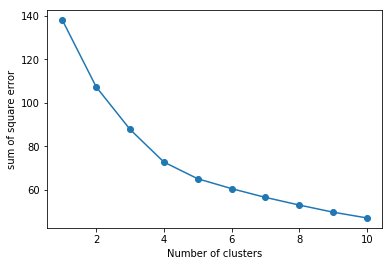

In [607]:
d = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random')
    km.fit(Z)
    d.append(km.inertia_)

# plot
plt.plot(range(1, 11), d, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('sum of square error')
plt.show()



In [608]:
centers, clusters,km = clustering_on_wordvecs(Z, 4);
centroid_map = dict(zip(model.wv.index2word, clusters));

In [609]:
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="white", max_words=200, max_font_size=80, colormap=cmap);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num).zfill(2)]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num) )

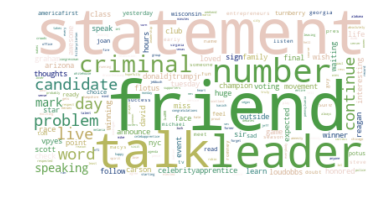

In [610]:
cmaps = cycle(['flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'nipy_spectral', 'gist_ncar'])
for i in range(4):
    col = next(cmaps);
    display_cloud(i+1, col)

In [611]:
def get_word_table(table, key, sim_key='similarity', show_sim = True):
    if show_sim == True:
        return pd.DataFrame(table, columns=[key, sim_key])
    else:
        return pd.DataFrame(table, columns=[key, sim_key])[key]
    

In [612]:
keys = ['win', 'clinton', 'trump', 'obama', 'america',  'republican', ];
tables = [];
for key in keys:
    tables.append(get_word_table(model.wv.similar_by_word(key), key, show_sim=False))
    
pd.concat(tables, axis=1)

,win,clinton,trump,obama,america,republican
0,primari,crook,donald,elect,make,senat
1,team,hillari,realdonaldtrump,investig,great,congress
2,race,campaign,via,noth,let,vote
3,gener,fbi,web,email,safe,pass
4,scott,beat,client,spi,maga,parti
5,wife,email,makeamericagreatagain,berni,god,fix
6,depart,investig,fals,obstruct,bless,care
7,john,collus,true,paid,honor,desper
8,tuesday,russia,android,call,togeth,crimin
9,miss,comey,twitter,angri,thank,nanci


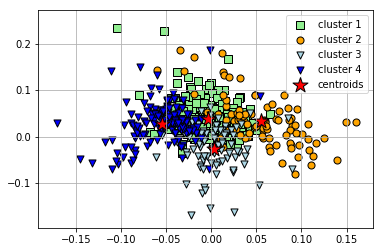

In [613]:
plt.scatter(
    Z[clusters == 0, 0], Z[clusters == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    Z[clusters == 1, 0], Z[clusters== 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    Z[clusters == 2, 0], Z[clusters== 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    Z[clusters == 3, 0], Z[clusters== 3, 1],
    s=50, c='blue',
    marker='v', edgecolor='black',
    label='cluster 4'
)

#plt.scatter(
 #   Z[clusters == 4, 0], Z[clusters== 4, 1],
  #  s=50, c='yellow',
   # marker='v', edgecolor='black',
   # label='cluster 5'
#)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()